In [1]:
# Imports
# !pip install torchinfo
import torch
import torch.nn as nn
import torch.utils.data as Data
from torchvision import datasets, transforms
from torchinfo import summary
import matplotlib.pyplot as plt
import os
# os.environ['OPENBLAS_NUM_THREADS'] = '1'
import numpy as np
import random
import time
import TrainerVTS_V08F7 as TP
import DataSetting_v2 as DS

### Loader

In [2]:
gpu = 1
date = '240806'
run = '30'
exp = 'V08F4'  

In [3]:
datadir = f'../dataset/0509/make20_{run}-split/'
data = DS.ModalityLoader(data_dir=datadir, mmap_mode='r')

transform = transforms.Compose([
    transforms.Resize([128, 128]),
    transforms.ToTensor()])
train_set = DS.MyDataset('tv', data.train_data, transform=transform)
test_set = DS.MyDataset('test', data.test_data, transform=transform)
train_loader, valid_loader = DS.DataSplitter(train_set).split_loader()
test_loader = DS.DataSplitter(test_set, 1).gen_loader()

Loading from ../dataset/0509/make20_30-split/


  0%|          | 0/20 [00:00<?, ?it/s]

Generating loaders...
 tv len 4858, distributed=False
 exported train loader of len 60, batch size 64
 exported valid loader of len 15, batch size 64

Generating loaders...
 test len 5701, distributed=False
 exported loader of len 5701, batch size 1


### Teacher

In [4]:
torch.cuda.set_device(gpu)

T_trainer = TP.TeacherTrainer(beta=0.5,
                              name='Teacher',
                              loss_optimizer = {'LOSS': [torch.optim.Adam, 1e-4]},
                              lr=1e-4, epochs=10, cuda=gpu,
                              train_loader=train_loader, valid_loader=valid_loader, test_loader=test_loader,
                              notion=f"{date}_{run}_{exp}")

==========240806_30_V08F4 Training starting==========

Teacher train: epoch=1/999, batch=55/60, loss=4871.8477, current best valid loss=inf @ epoch 0     
Teacher valid: epoch=1/999, batch=10/15, loss=4693.4282, current best valid loss=4621.6519 @ epoch 1        
Teacher train: epoch=2/999, batch=55/60, loss=4057.0024, current best valid loss=4621.6519 @ epoch 1    
Teacher valid: epoch=2/999, batch=10/15, loss=4137.2056, current best valid loss=4163.2734 @ epoch 2        
Teacher train: epoch=3/999, batch=55/60, loss=4075.6323, current best valid loss=4163.2734 @ epoch 2    
Teacher valid: epoch=3/999, batch=10/15, loss=4438.8467, current best valid loss=4126.2646 @ epoch 3        
Teacher train: epoch=4/999, batch=55/60, loss=3533.7117, current best valid loss=4099.8834 @ epoch 3    
Teacher valid: epoch=4/999, batch=10/15, loss=3441.3342, current best valid loss=3159.8136 @ epoch 4        
Teacher train: epoch=5/999, batch=55/60, loss=3052.8657, current best valid loss=3159.8136 @ e

<Figure size 432x288 with 0 Axes>

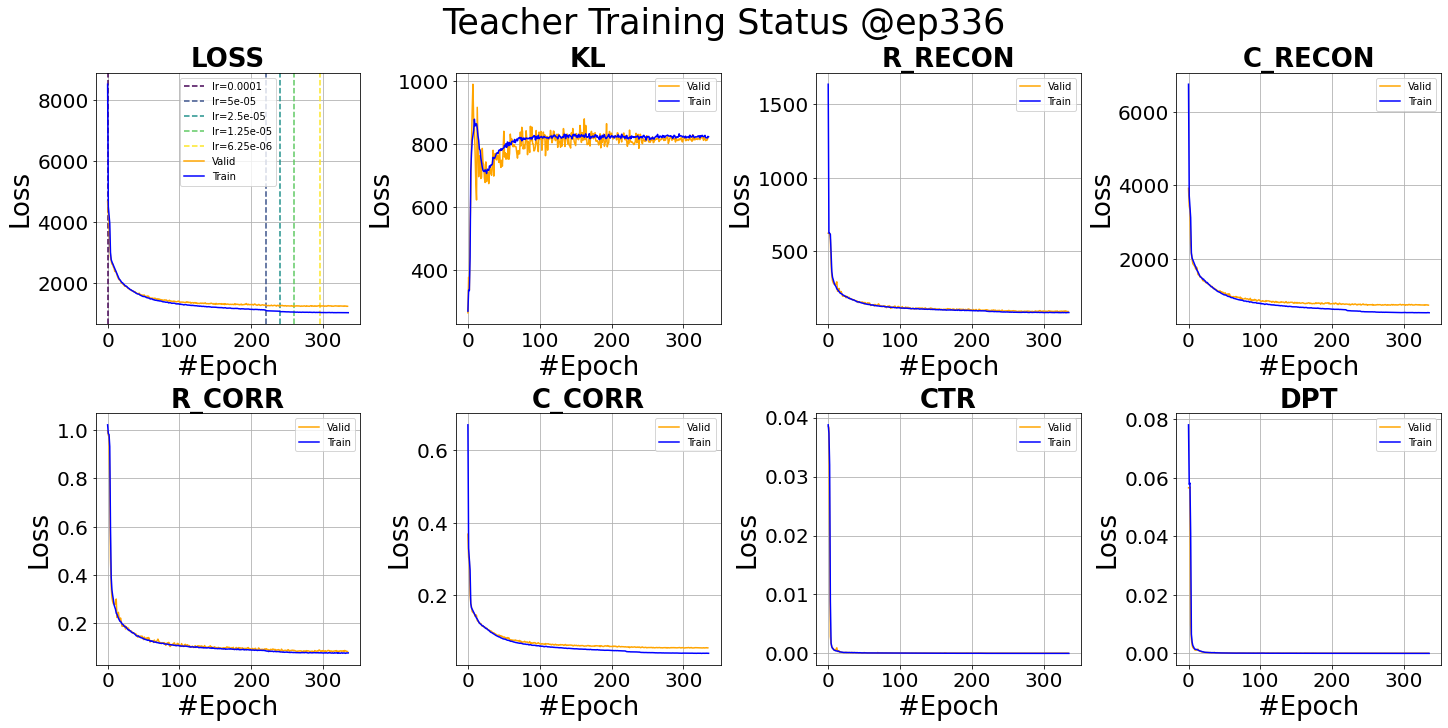

==========240806_30_V08F4 Test starting==========



/home/bob/.local/lib/python3.7/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([2])) that is different to the input size (torch.Size([1, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/bob/.local/lib/python3.7/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Teacher test: sample=55/60, loss=478.8839    
Test finished. Average loss={'LOSS': 620.4527316013972, 'KL': 12.787528123830755, 'R_RECON': 84.67610925038656, 'C_RECON': 529.382847793897, 'R_CORR': 0.08036519189675649, 'C_CORR': 0.04978148986895879, 'CTR': 7.050214425688775e-06, 'DPT': 1.1787036212822464e-05}

Total training time: 33.3236870765686 sec


<Figure size 1440x720 with 0 Axes>

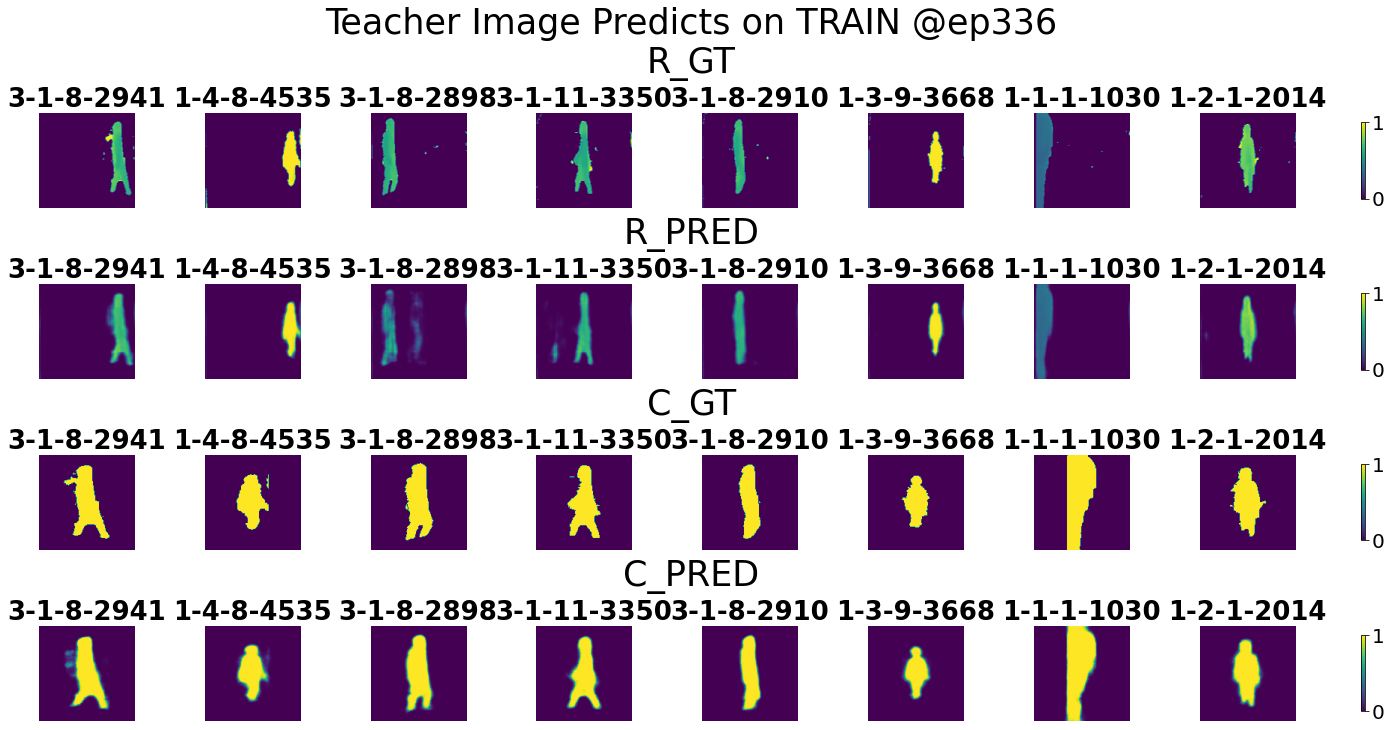

<Figure size 1440x720 with 0 Axes>

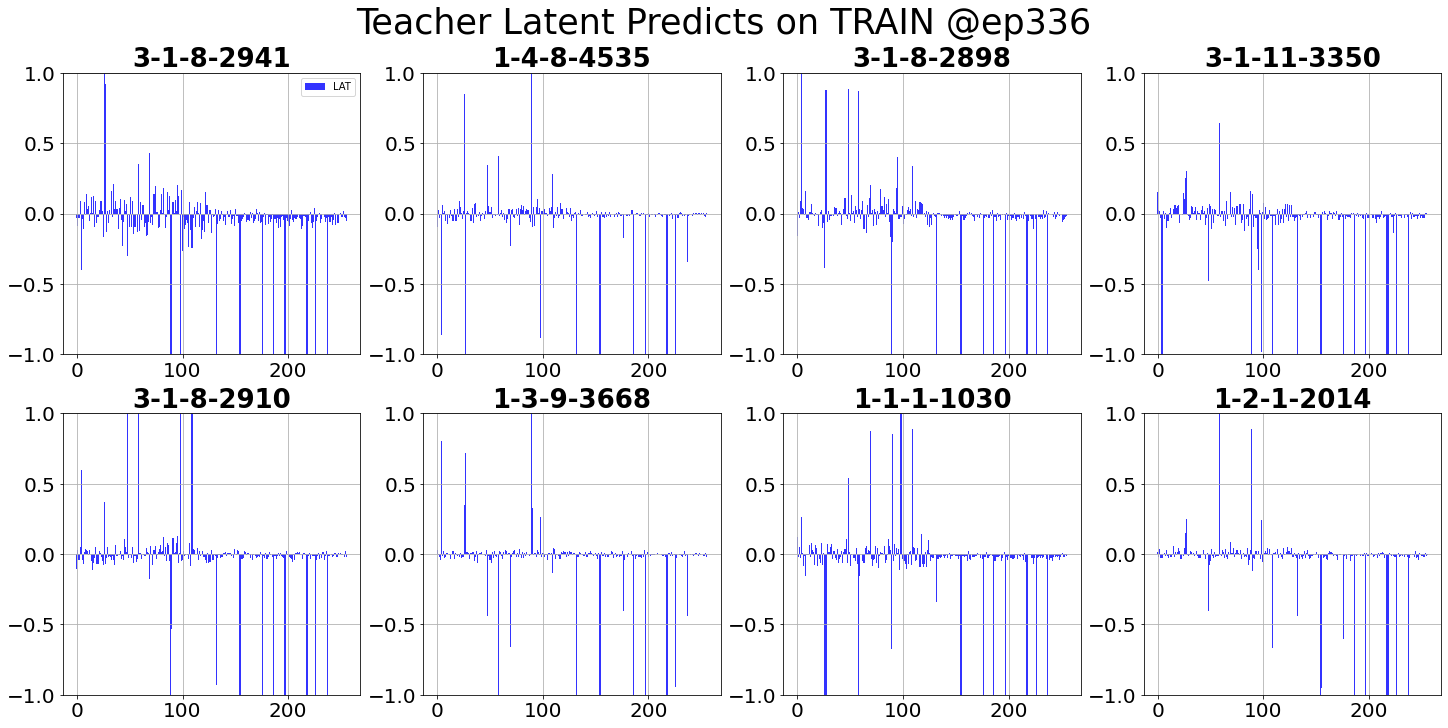

<Figure size 1440x720 with 0 Axes>

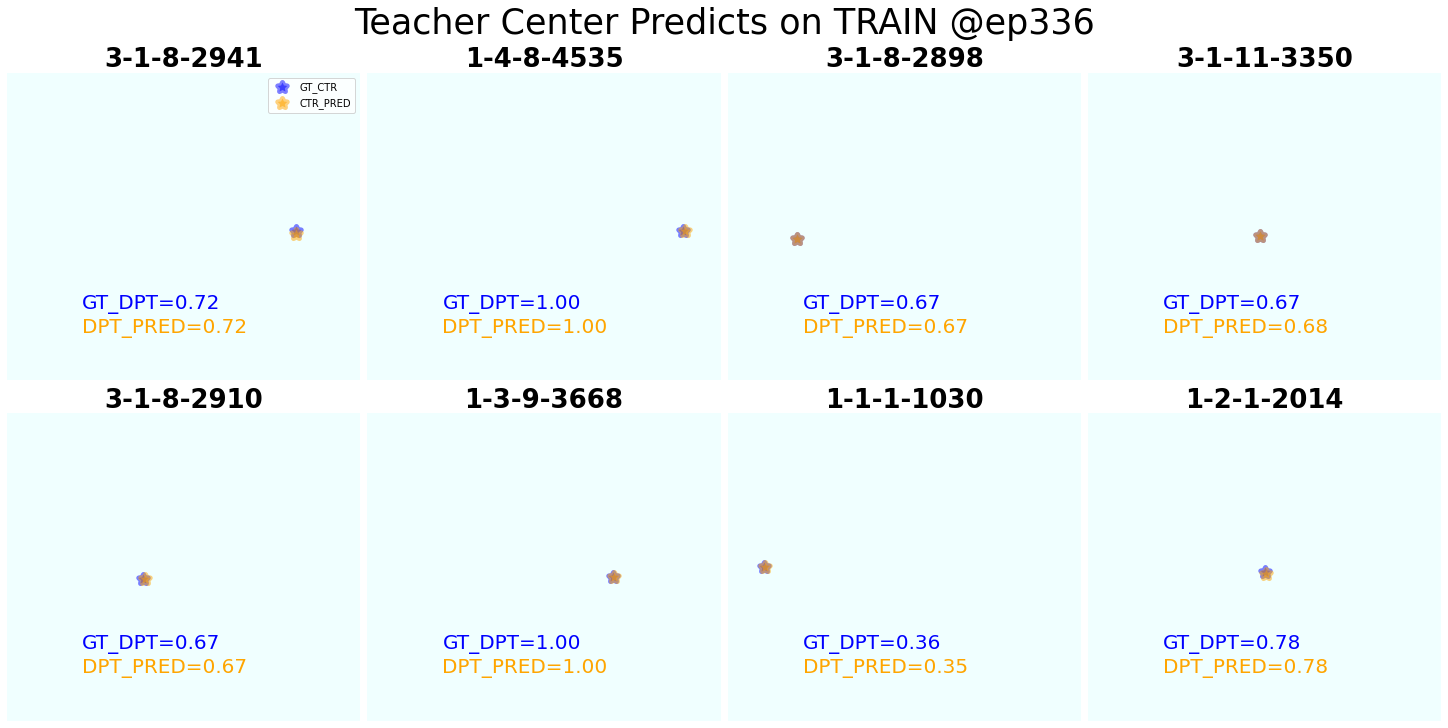

==========240806_30_V08F4 Test starting==========

Teacher test: sample=5700/5701, loss=1690.4852     
Test finished. Average loss={'LOSS': 973.231319484366, 'KL': 11.589980695189519, 'R_RECON': 118.19268428666658, 'C_RECON': 849.2433929871601, 'R_CORR': 0.12097490483094801, 'C_CORR': 0.07480571095806698, 'CTR': 5.796430498362469e-05, 'DPT': 0.00020224341616618486}

Total training time: 79.85669422149658 sec


<Figure size 1440x720 with 0 Axes>

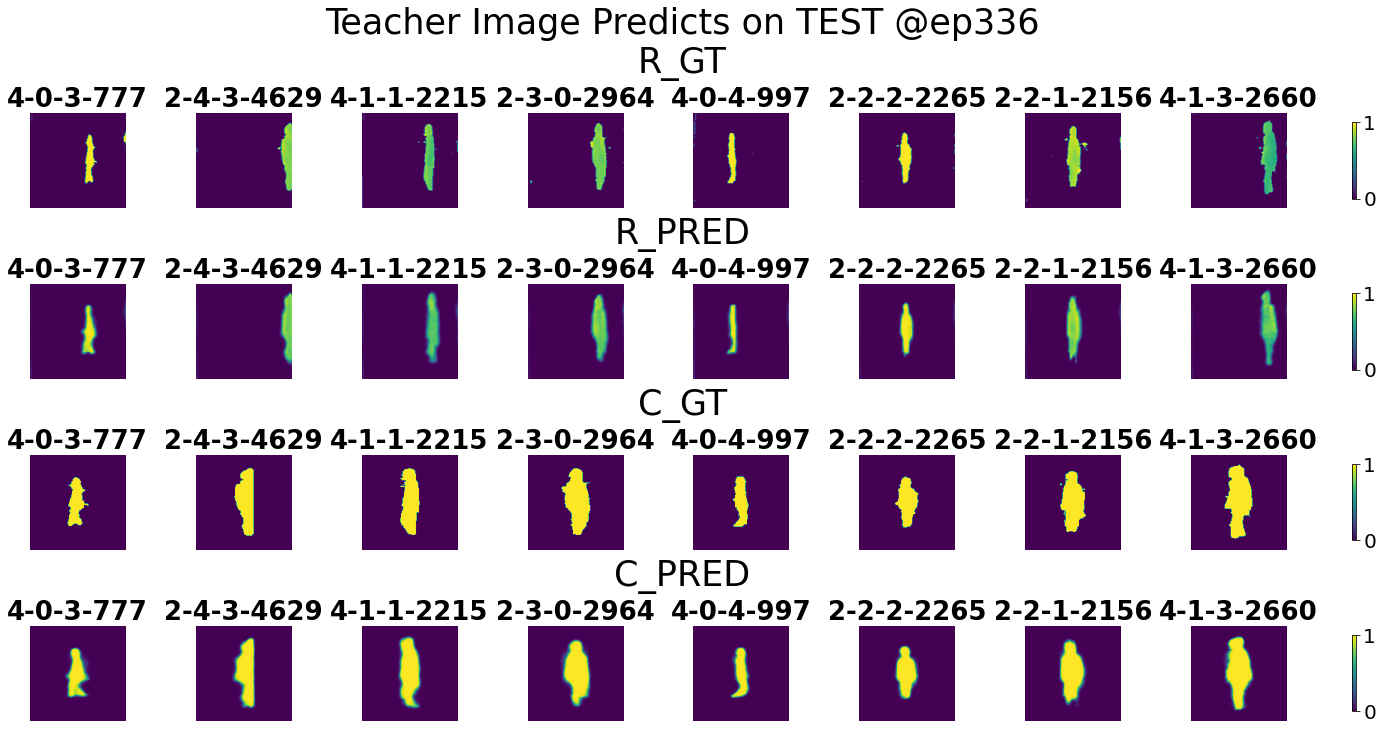

<Figure size 1440x720 with 0 Axes>

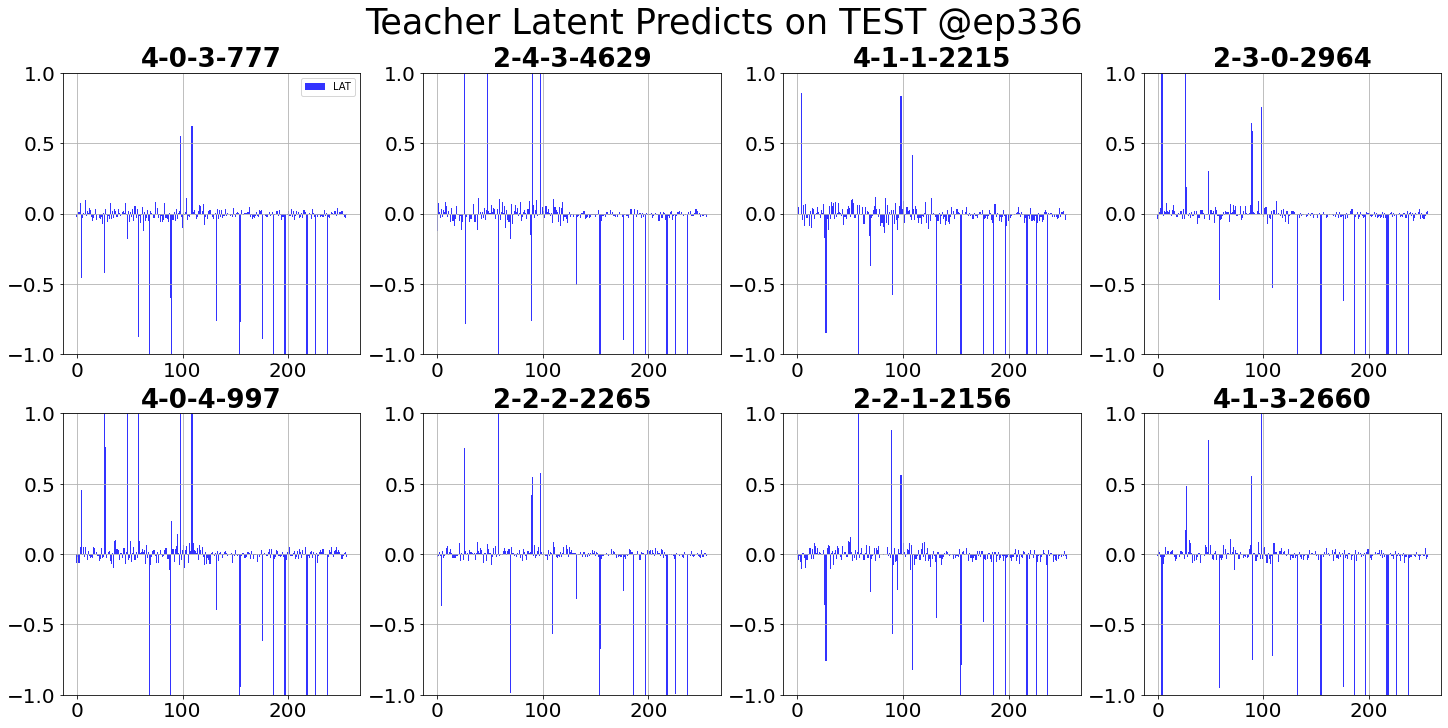

<Figure size 1440x720 with 0 Axes>

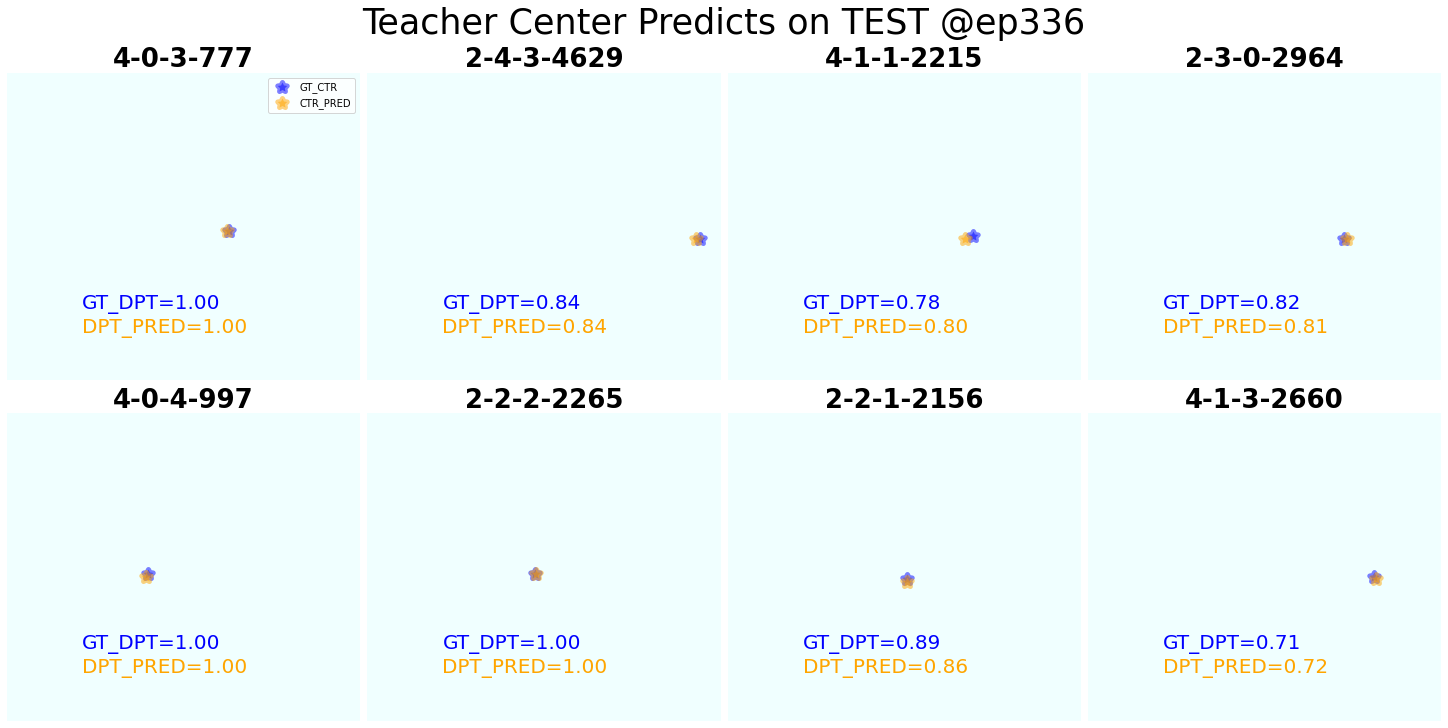

Saving preds: R_PRED...
Saving preds: C_PRED...
Saving preds: DPT_PRED...
Saving preds: CTR_PRED...
Saving preds: LAT...
Saving preds: TAG...
All saved!

Teacher schedule Completed!


In [5]:
### Scheduler
%matplotlib inline
#T_trainer.loss_optimizer = {'LOSS': [torch.optim.Adam, 1e-4]}
T_trained = T_trainer.schedule(lr_decay=True)

==========240806_30_V08F4_CORR_balanced Training starting==========

Teacher train: epoch=1/999, batch=55/60, loss=5.9871, current best valid loss=inf @ epoch 0     
Teacher valid: epoch=1/999, batch=10/15, loss=6.1489, current best valid loss=5.2884 @ epoch 1        
Teacher train: epoch=2/999, batch=55/60, loss=4.9817, current best valid loss=5.2884 @ epoch 1    
Teacher valid: epoch=2/999, batch=10/15, loss=4.7895, current best valid loss=4.4830 @ epoch 2        
Teacher train: epoch=3/999, batch=55/60, loss=4.0696, current best valid loss=4.4830 @ epoch 2    
Teacher valid: epoch=3/999, batch=10/15, loss=3.6075, current best valid loss=3.5662 @ epoch 3        
Teacher train: epoch=4/999, batch=55/60, loss=3.2875, current best valid loss=3.5662 @ epoch 3    
Teacher valid: epoch=4/999, batch=10/15, loss=3.2770, current best valid loss=3.2027 @ epoch 4        
Teacher train: epoch=5/999, batch=55/60, loss=3.1765, current best valid loss=3.2027 @ epoch 4    
Teacher valid: epoch=5/999

<Figure size 432x288 with 0 Axes>

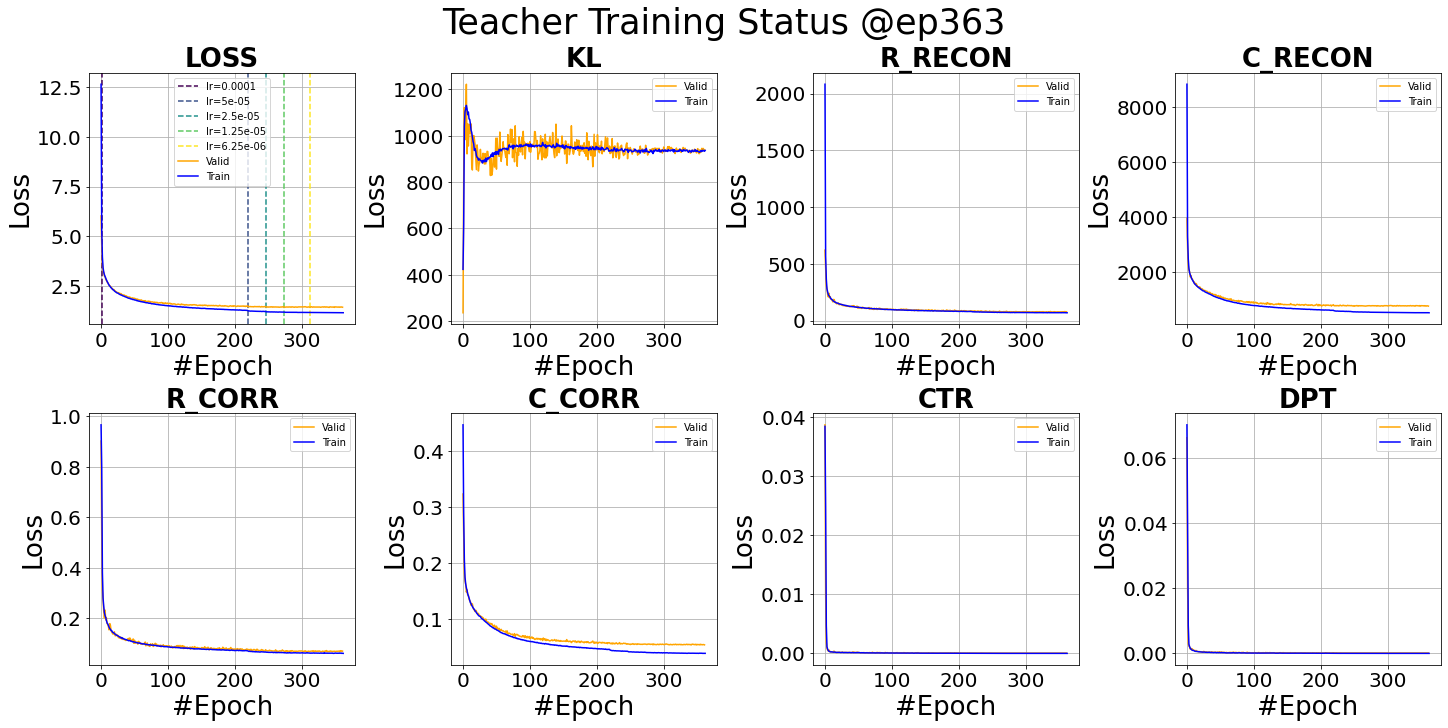

==========240806_30_V08F4_CORR_balanced Test starting==========



/home/bob/.local/lib/python3.7/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([2])) that is different to the input size (torch.Size([1, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/bob/.local/lib/python3.7/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Teacher test: sample=55/60, loss=0.5294    
Test finished. Average loss={'LOSS': 0.6848188051100199, 'KL': 14.751632867008448, 'R_RECON': 68.3221267995735, 'C_RECON': 498.4462680578232, 'R_CORR': 0.06365453962547084, 'C_CORR': 0.04700013133697212, 'CTR': 8.260836171697835e-06, 'DPT': 1.1634638844178202e-05}

Total training time: 31.941323041915894 sec


<Figure size 1440x720 with 0 Axes>

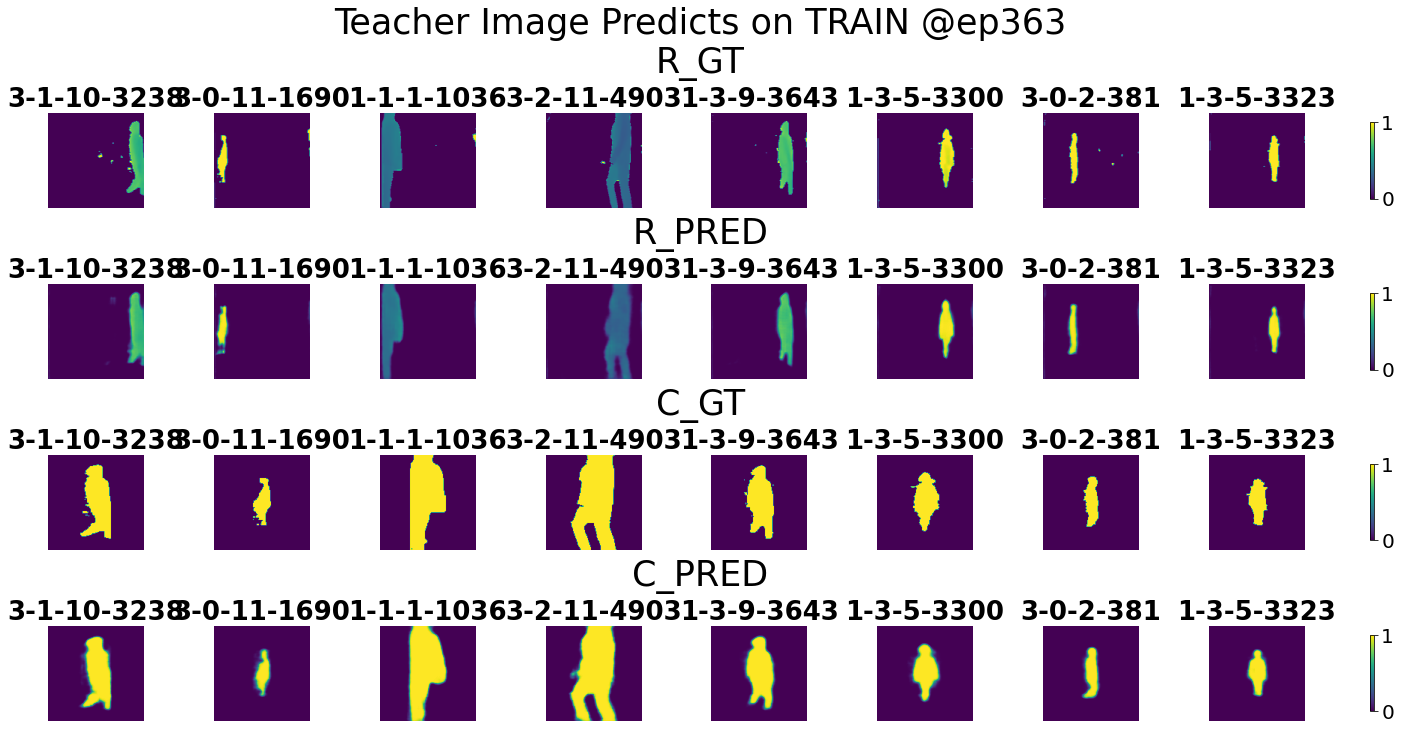

<Figure size 1440x720 with 0 Axes>

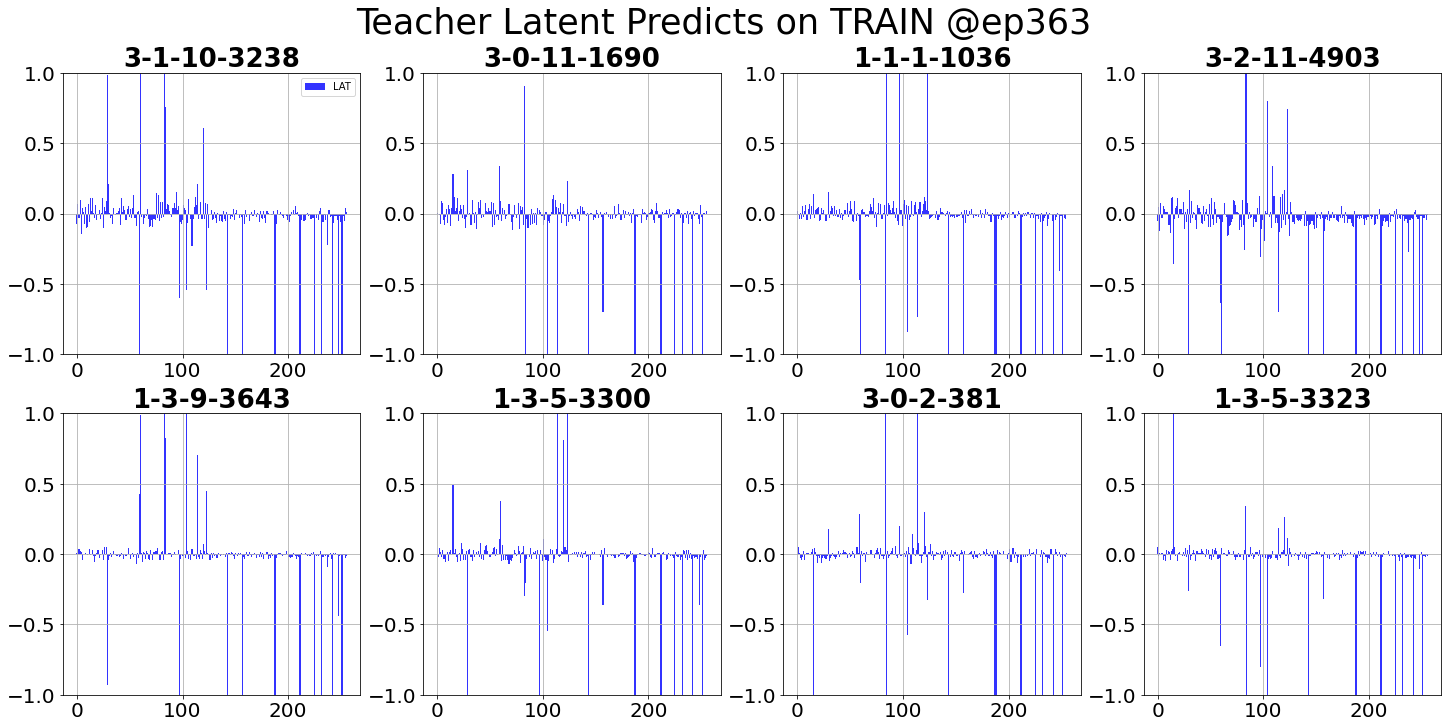

<Figure size 1440x720 with 0 Axes>

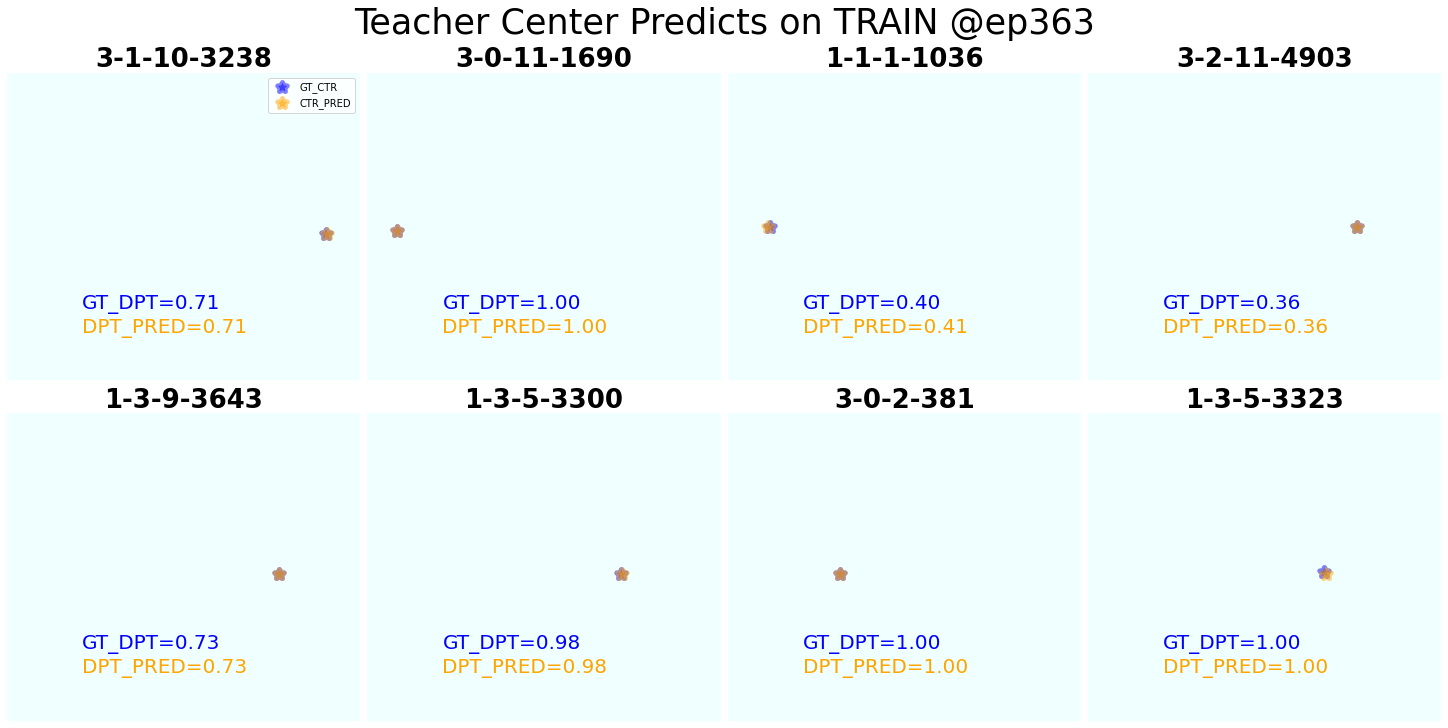

==========240806_30_V08F4_CORR_balanced Test starting==========

Teacher test: sample=5700/5701, loss=0.4003    
Test finished. Average loss={'LOSS': 1.1422384731436253, 'KL': 13.714286694796833, 'R_RECON': 96.42002407472775, 'C_RECON': 868.6802277724756, 'R_CORR': 0.09520221966188261, 'C_CORR': 0.07460649033174914, 'CTR': 7.771704229080336e-05, 'DPT': 0.00039460490001318535}

Total training time: 77.77436900138855 sec


<Figure size 1440x720 with 0 Axes>

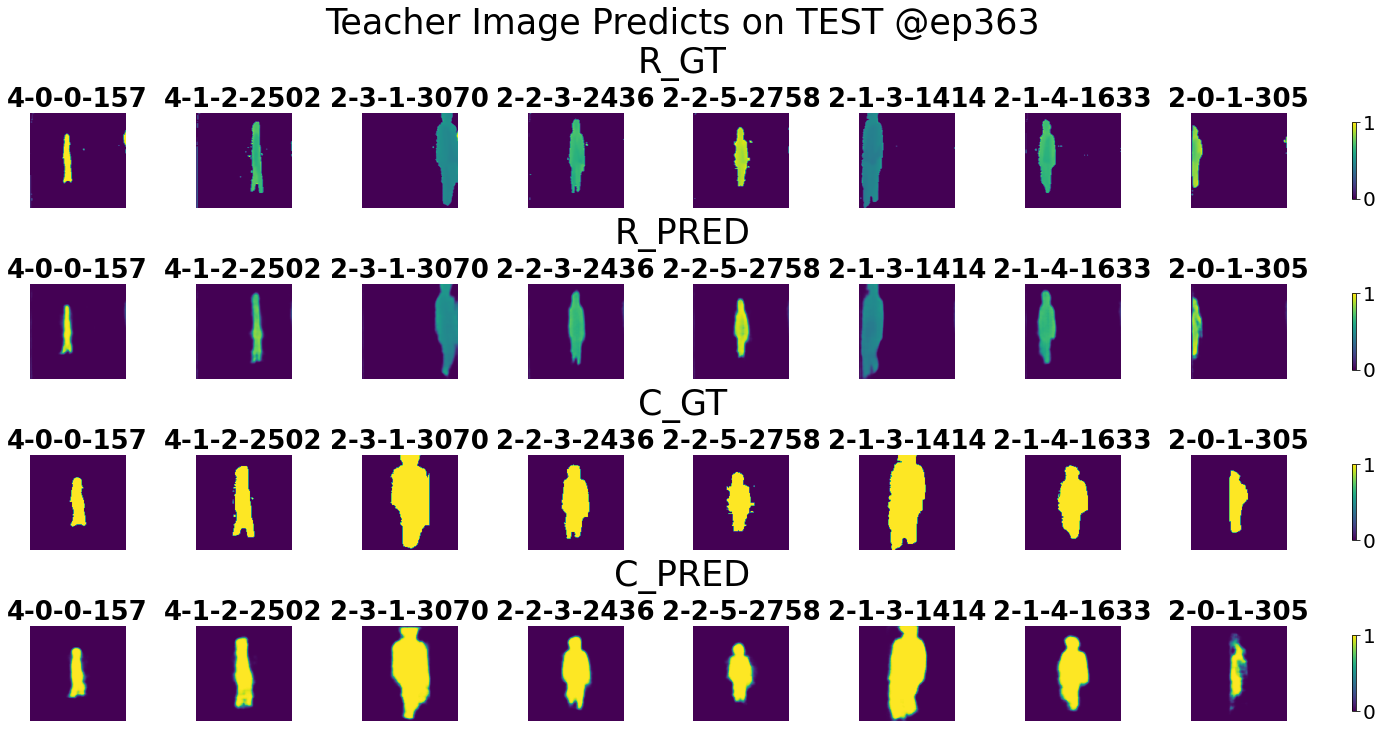

<Figure size 1440x720 with 0 Axes>

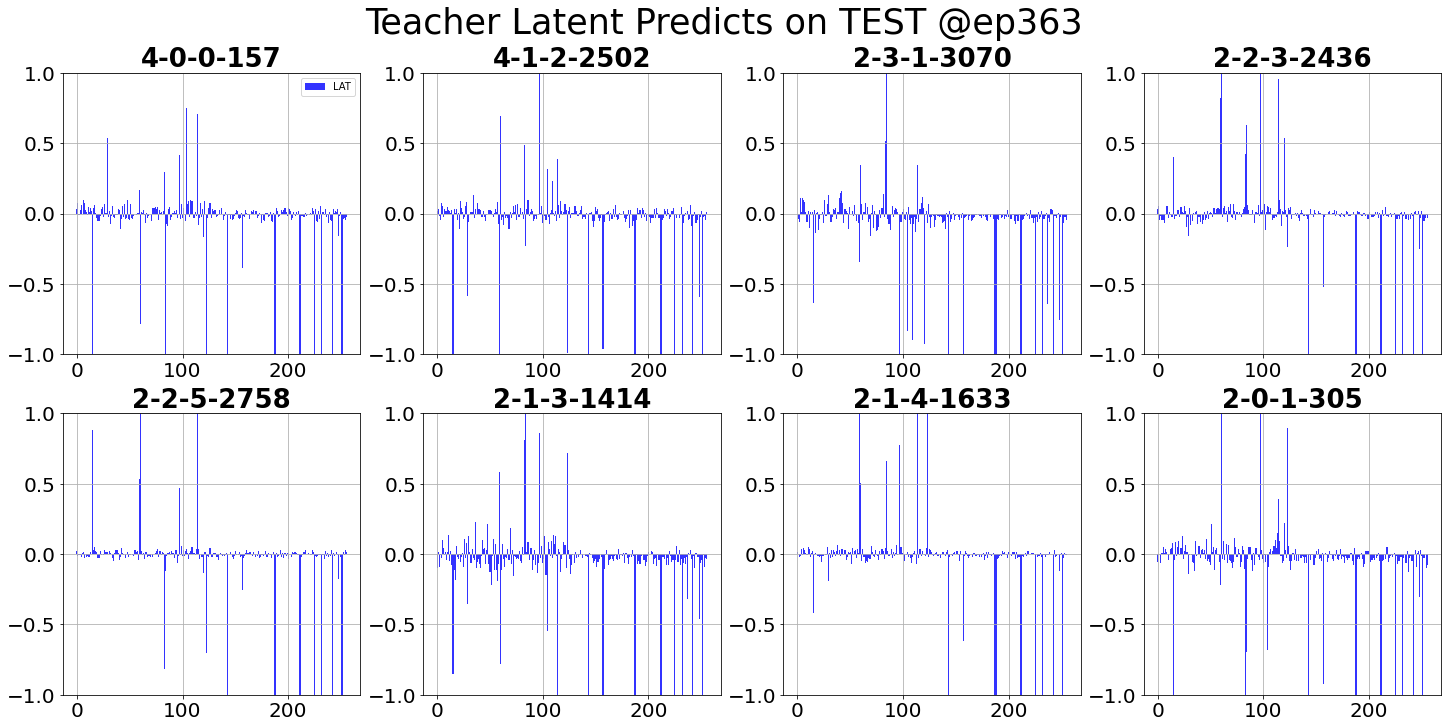

<Figure size 1440x720 with 0 Axes>

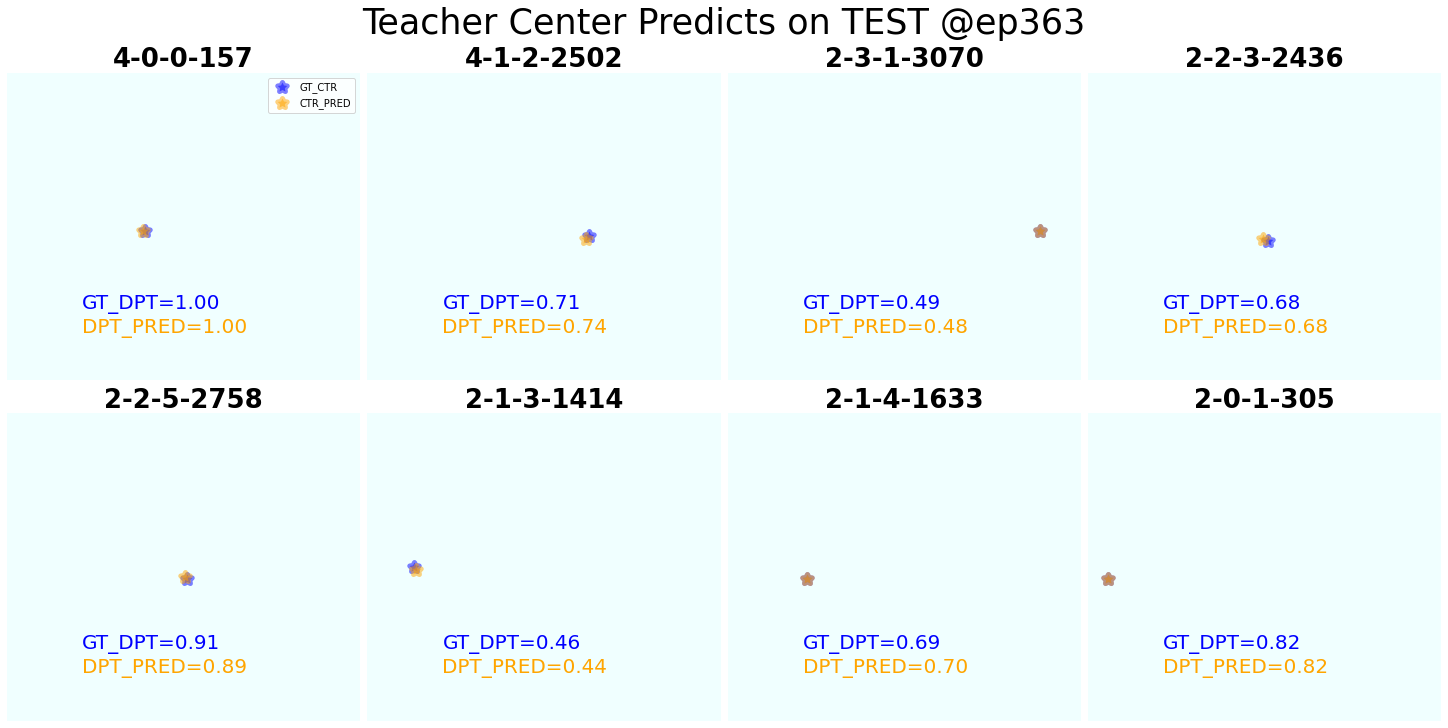

Saving preds: R_PRED...
Saving preds: C_PRED...
Saving preds: DPT_PRED...
Saving preds: CTR_PRED...
Saving preds: LAT...
Saving preds: TAG...
All saved!

Teacher schedule Completed!


In [4]:
T_trainer = TP.TeacherTrainer(beta=0.5,
                              name='Teacher',
                              with_correlation=True,
                              loss_optimizer = {'LOSS': [torch.optim.Adam, 1e-4]},
                              lr=1e-4, epochs=10, cuda=gpu,
                              train_loader=train_loader, valid_loader=valid_loader, test_loader=test_loader,
                              notion=f"{date}_{run}_{exp}_CORR_balanced")
### Scheduler
%matplotlib inline
#T_trainer.loss_optimizer = {'LOSS': [torch.optim.Adam, 1e-4]}
T_trained = T_trainer.schedule(lr_decay=True)

### Student

In [4]:
torch.cuda.set_device(gpu)
csiencoder = TP.CSIEncoder(lstm_steps=7, latent_dim=128)
centerdecoder = TP.CenterDecoder()
imgencoder = TP.ImageEncoder(latent_dim=128)
imgdecoder = TP.ImageDecoder(latent_dim=128)
imgencoder.load_state_dict(torch.load(f"../saved/240619_30_V08E2/Teacher_IMGENV08E1_best.pth"))
imgdecoder.load_state_dict(torch.load(f"../saved/240619_30_V08E2/Teacher_IMGDEV08E1_best.pth"))
#imgencoder = T_trained['imgen']
#imgdecoder = T_trained['imgde']

S_trainer = TP.StudentTrainer(name='Student', mask=True,
                              with_img_loss=False,
                              networks=[csiencoder, centerdecoder, imgencoder, imgdecoder],
                              loss_optimizer = {'LOSS': [torch.optim.Adam, 1e-4]},
                              lr=1e-4, epochs=10, cuda=gpu,
                              notion=f"{date}_{run}_{exp}",
                              train_loader=train_loader, valid_loader=valid_loader, test_loader=test_loader,
                             )

Student train: epoch=1/999, batch=0/60, loss=0.2333, current best valid loss=inf @ epoch 0    
Student train: epoch=1/999, batch=5/60, loss=0.2096, current best valid loss=inf @ epoch 0    
Student train: epoch=1/999, batch=10/60, loss=0.2063, current best valid loss=inf @ epoch 0    
Student train: epoch=1/999, batch=15/60, loss=0.1818, current best valid loss=inf @ epoch 0    
Student train: epoch=1/999, batch=20/60, loss=0.1641, current best valid loss=inf @ epoch 0    
Student train: epoch=1/999, batch=25/60, loss=0.1581, current best valid loss=inf @ epoch 0    
Student train: epoch=1/999, batch=30/60, loss=0.1441, current best valid loss=inf @ epoch 0    
Student train: epoch=1/999, batch=35/60, loss=0.1512, current best valid loss=inf @ epoch 0    
Student train: epoch=1/999, batch=40/60, loss=0.1496, current best valid loss=inf @ epoch 0    
Student train: epoch=1/999, batch=45/60, loss=0.1468, current best valid loss=inf @ epoch 0    
Student train: epoch=1/999, batch=50/60, l

<Figure size 432x288 with 0 Axes>

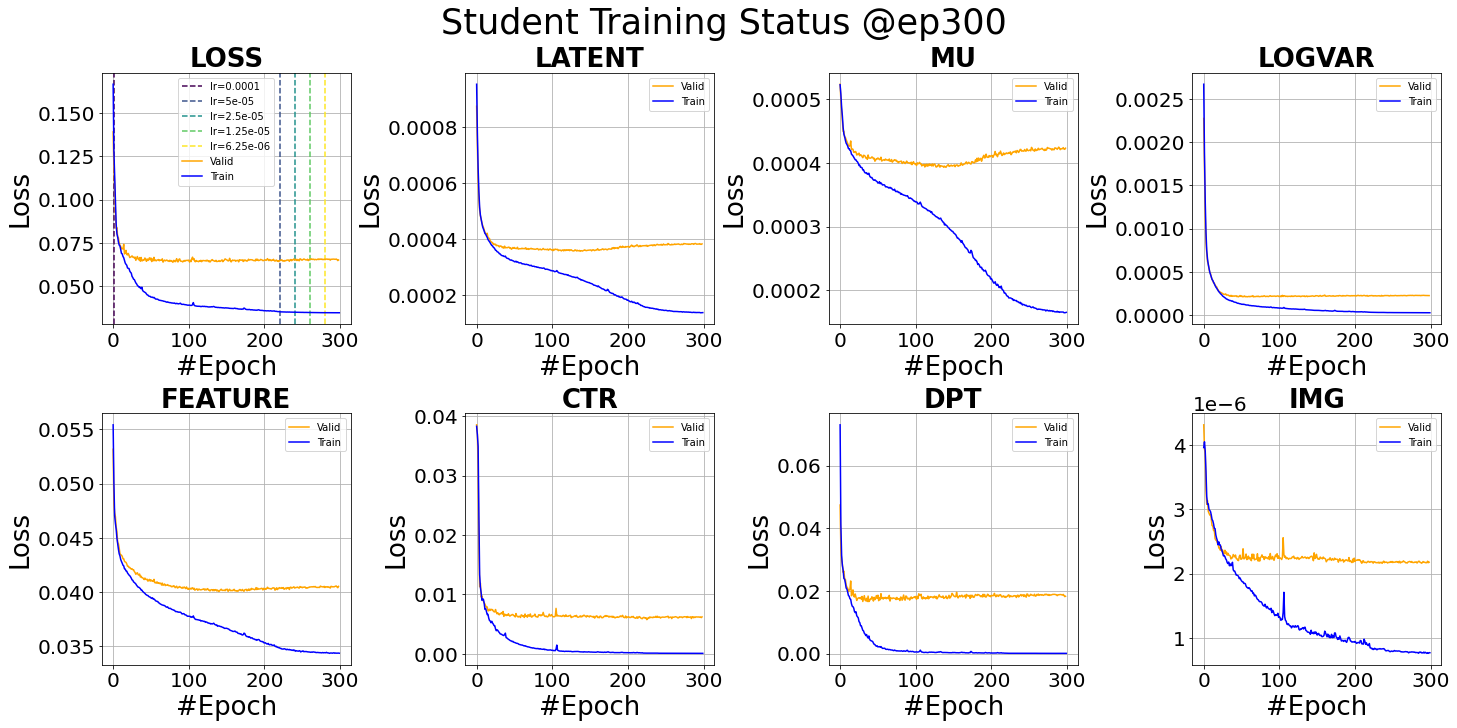

/home/bob/.local/lib/python3.7/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([2])) that is different to the input size (torch.Size([1, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/bob/.local/lib/python3.7/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Student test: sample=55/60, loss=0.0253    
Test finished. Average loss={'LOSS': 0.035147466271397816, 'LATENT': 0.008475143939737488, 'MU': 0.010260625604341081, 'LOGVAR': 0.0013332165017345687, 'FEATURE': 0.034239978925324974, 'CTR': 3.9647401050691905e-05, 'DPT': 2.0325536877756115e-05, 'IMG': 6.762232218868832e-07}

Total training time: 39.6366286277771 sec


<Figure size 1440x720 with 0 Axes>

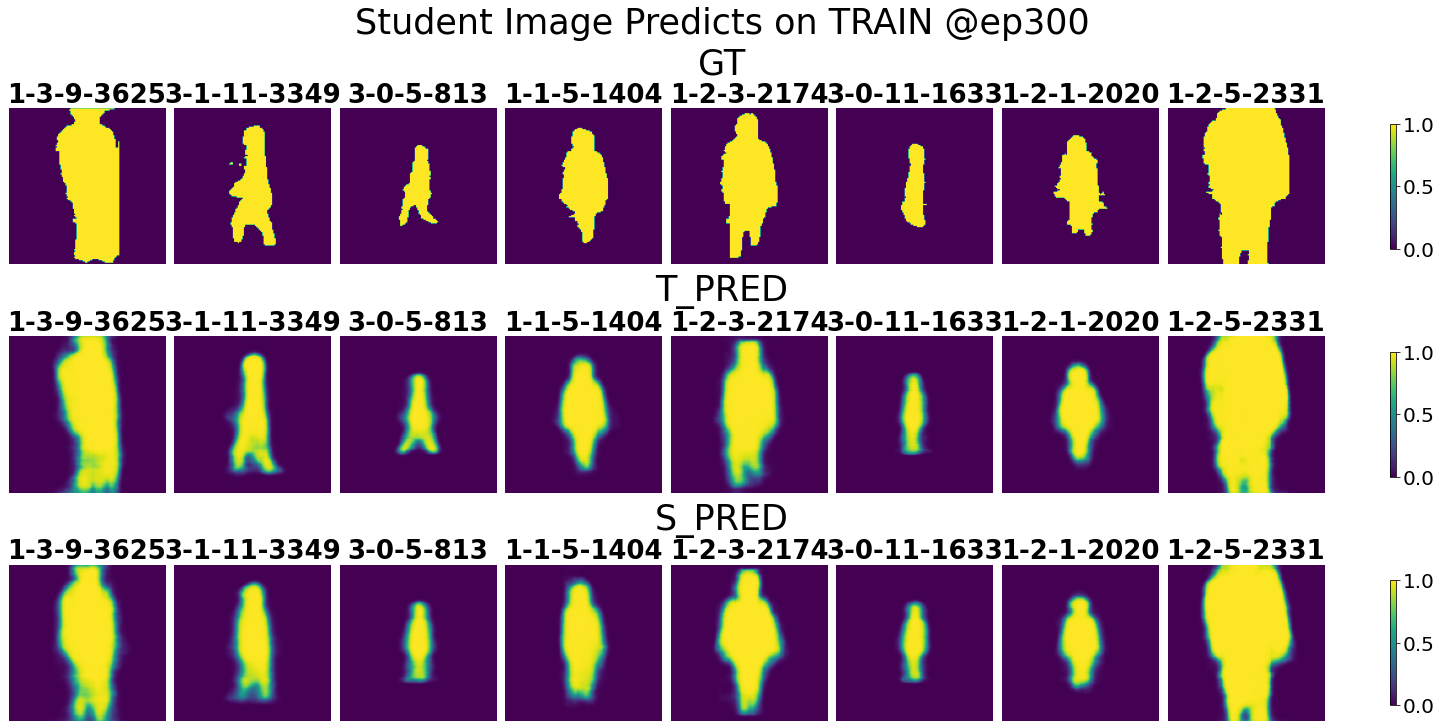

<Figure size 1440x720 with 0 Axes>

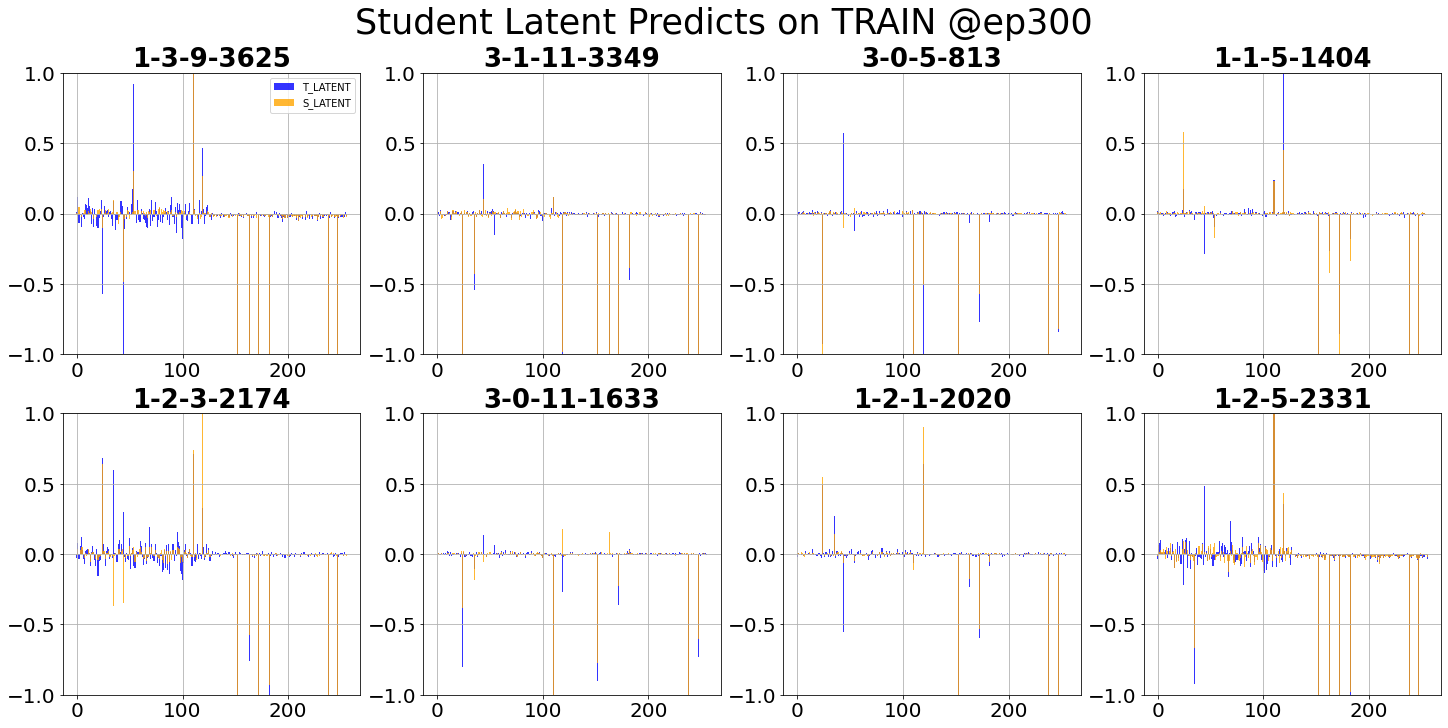

<Figure size 1440x720 with 0 Axes>

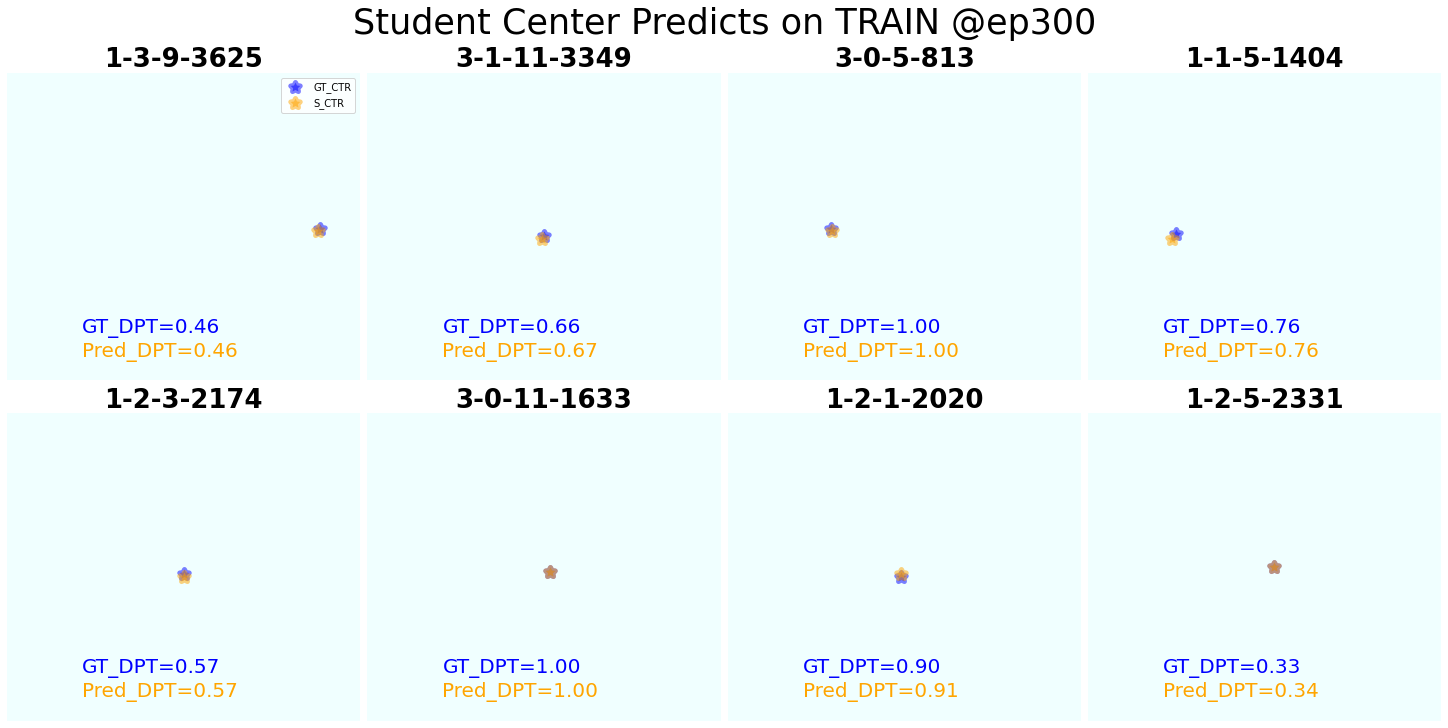

<Figure size 1440x720 with 0 Axes>

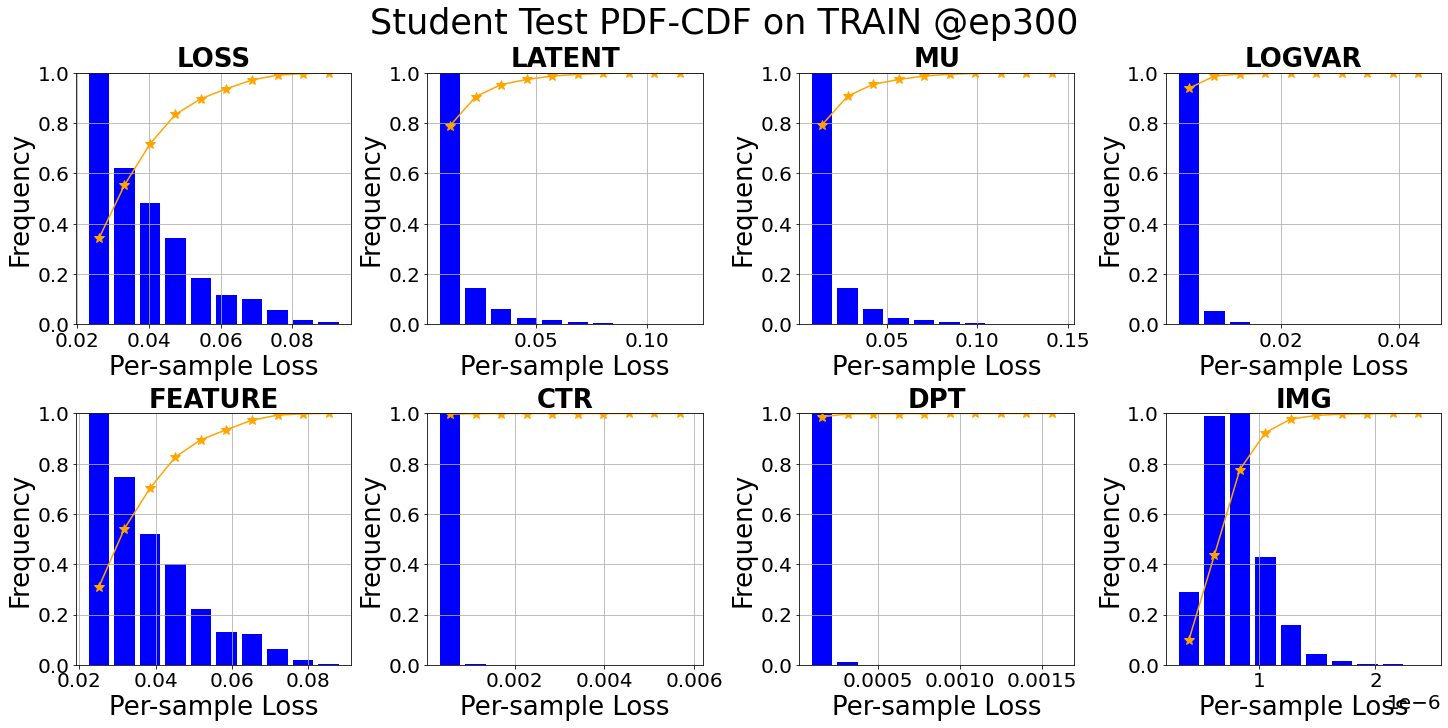

Student test: sample=5700/5701, loss=0.0351    
Test finished. Average loss={'LOSS': 0.07512468540375483, 'LATENT': 0.02410545350201218, 'MU': 0.025236844875845862, 'LOGVAR': 0.01957988593409393, 'FEATURE': 0.03982666932756055, 'CTR': 0.00782992327434835, 'DPT': 0.025057547468069336, 'IMG': 2.398533255612004e-06}

Total training time: 220.45879459381104 sec


<Figure size 1440x720 with 0 Axes>

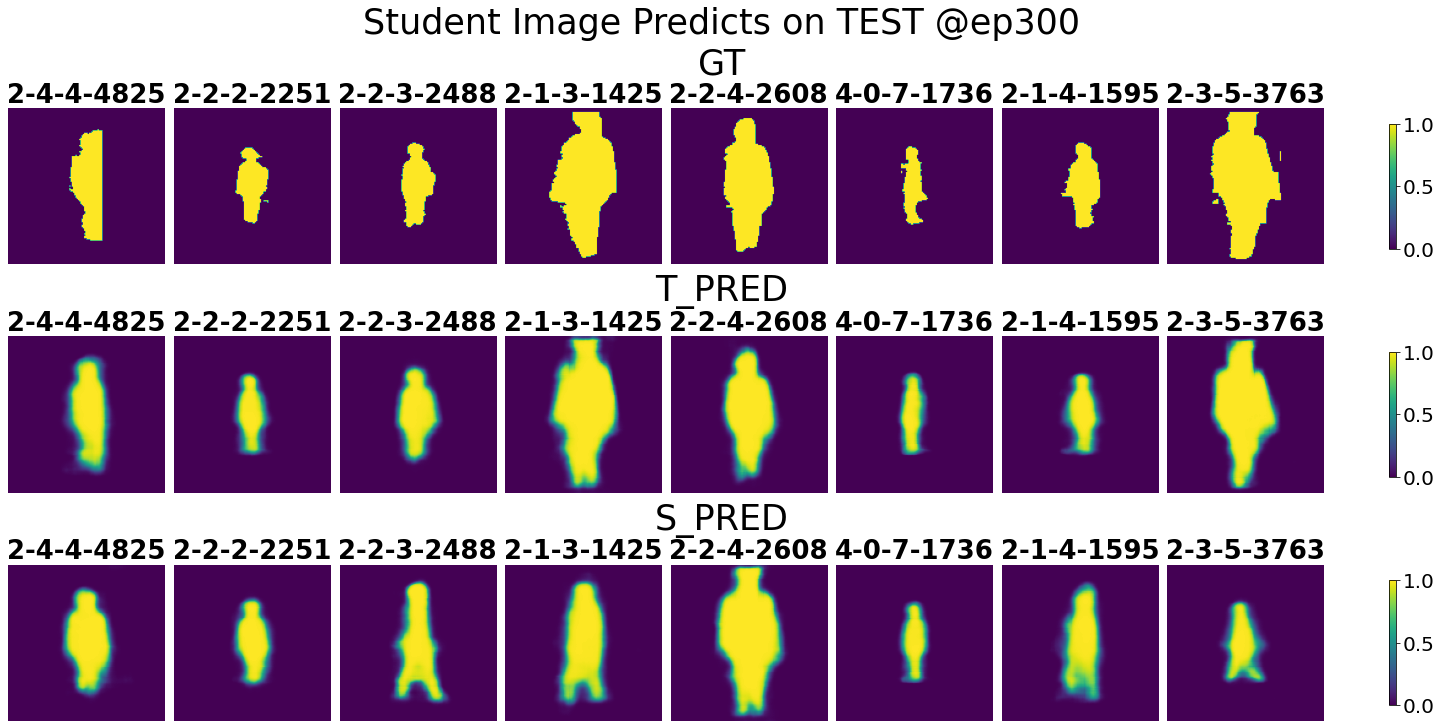

<Figure size 1440x720 with 0 Axes>

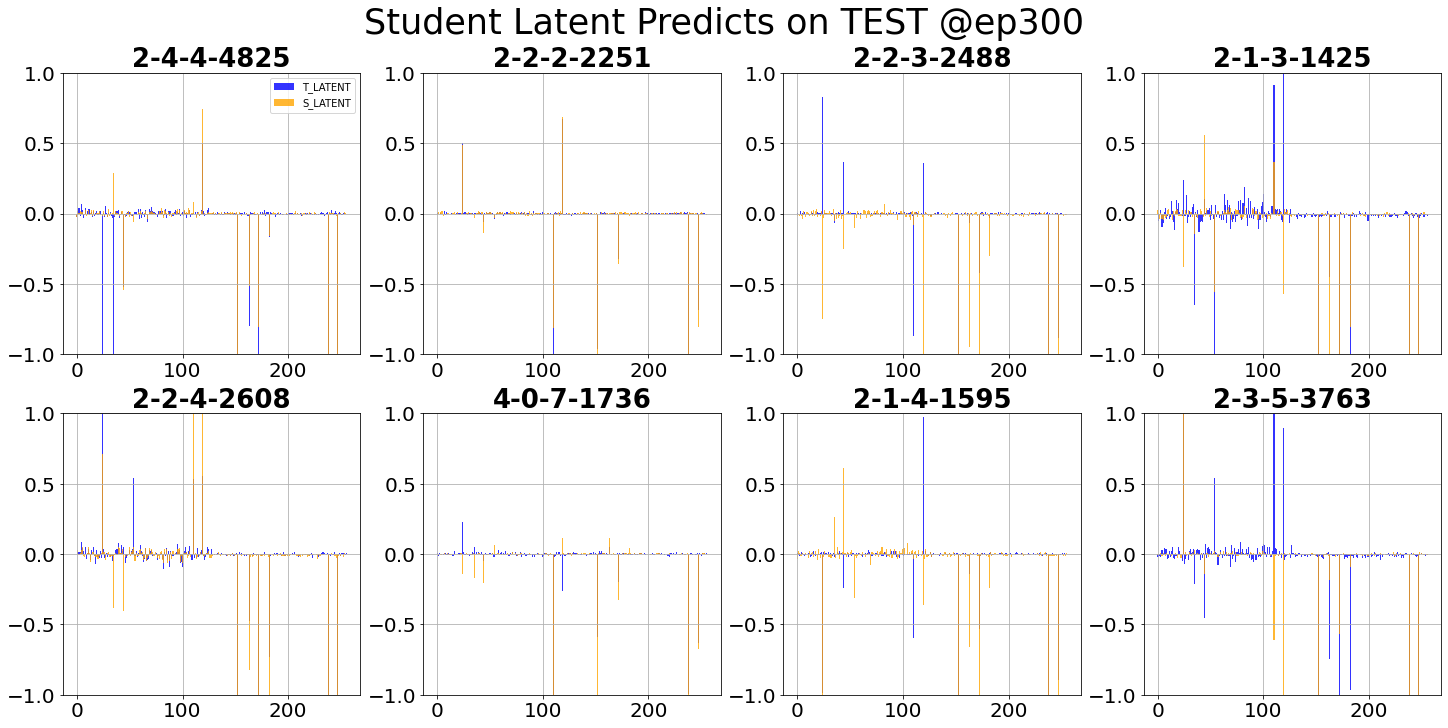

<Figure size 1440x720 with 0 Axes>

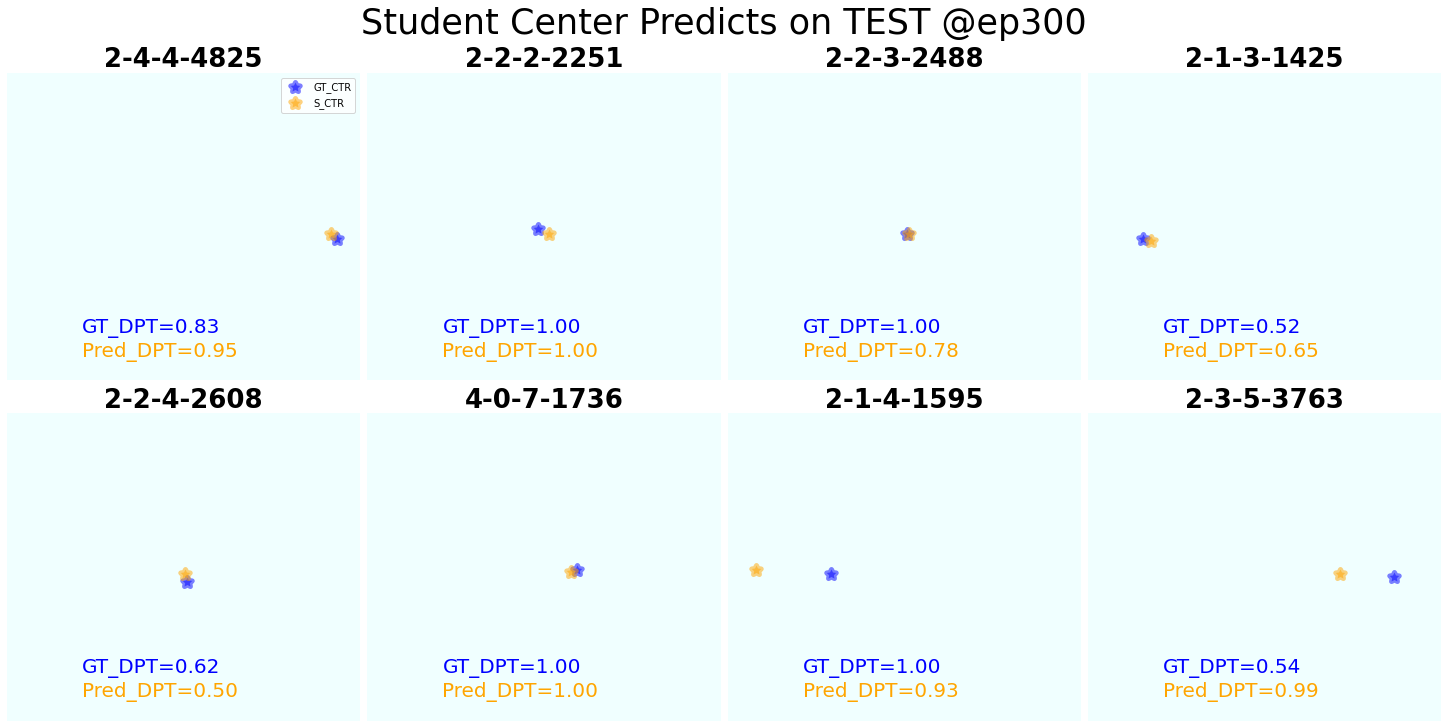

<Figure size 1440x720 with 0 Axes>

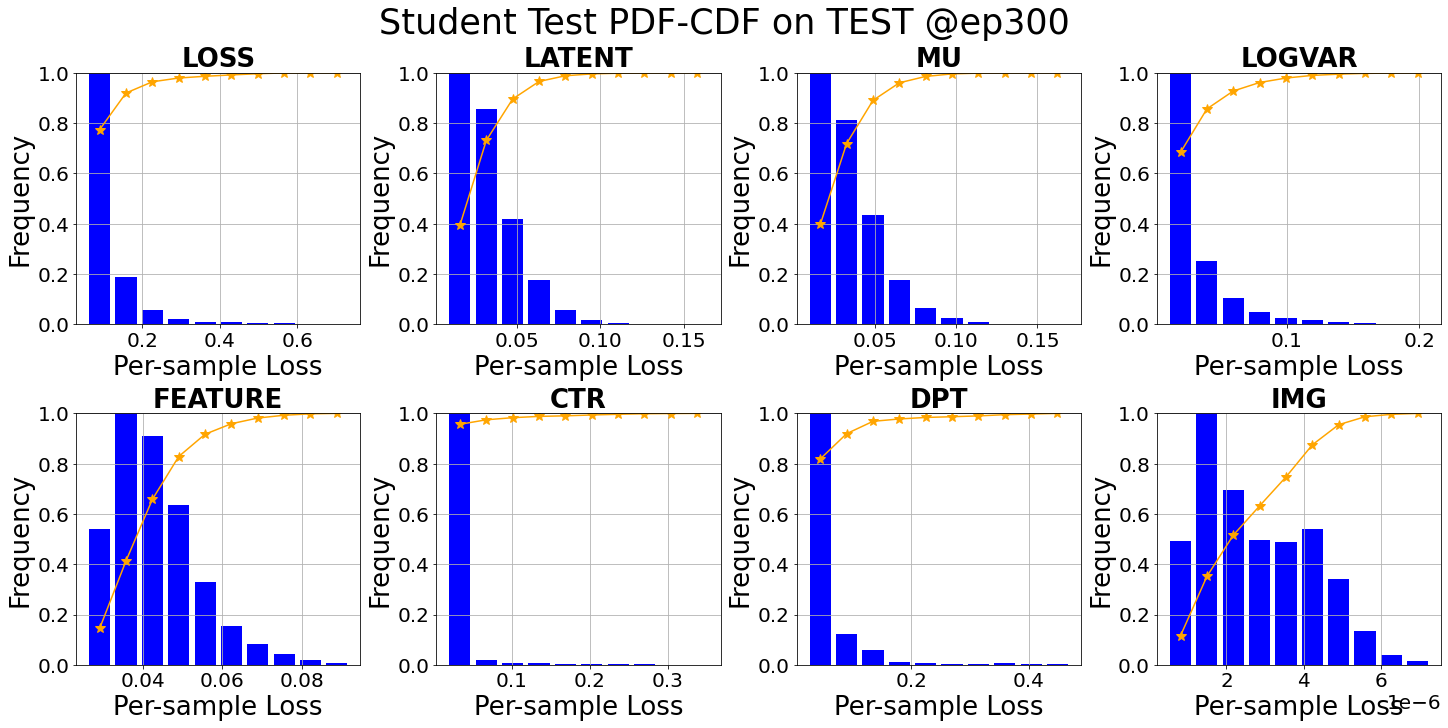

Saving preds: GT...
Saving preds: T_PRED...
Saving preds: S_PRED...
Saving preds: T_LATENT...
Saving preds: S_LATENT...
Saving preds: GT_CTR...
Saving preds: S_CTR...
Saving preds: GT_DPT...
Saving preds: S_DPT...
Saving preds: TAG...
All saved!

Student schedule Completed!


In [5]:
### Scheduler
%matplotlib inline
S_trainer.loss_optimizer = {'LOSS': [torch.optim.Adam, 1e-4]}
S_trained = S_trainer.schedule(lr_decay=True, train_module={'csien', 'ctrde'}, eval_module={'imgen', 'imgde'})

### Batch Experiment

Loading from ../dataset/0509/make20_300-split/


  0%|          | 0/20 [00:00<?, ?it/s]

Generating loaders...
 tv len 4181, distributed=False
 exported train loader of len 52, batch size 64
 exported valid loader of len 13, batch size 64

Generating loaders...
 test len 5299, distributed=False
 exported loader of len 5299, batch size 1
==========240822_300_V08F7_KL_4 Training starting==========

Student train: epoch=1/999, batch=50/52, loss=2.7924, current best valid loss=inf @ epoch 0    
Student valid: epoch=1/999, batch=10/13, loss=2.8372, current best valid loss=2.7806 @ epoch 1        
Student train: epoch=2/999, batch=50/52, loss=2.4439, current best valid loss=2.7759 @ epoch 1    
Student valid: epoch=2/999, batch=10/13, loss=2.4320, current best valid loss=2.4152 @ epoch 2        
Student train: epoch=3/999, batch=50/52, loss=2.3185, current best valid loss=2.4152 @ epoch 2    
Student valid: epoch=3/999, batch=10/13, loss=2.2978, current best valid loss=2.3317 @ epoch 3        
Student train: epoch=4/999, batch=50/52, loss=2.2890, current best valid loss=2.3244 @

<Figure size 432x288 with 0 Axes>

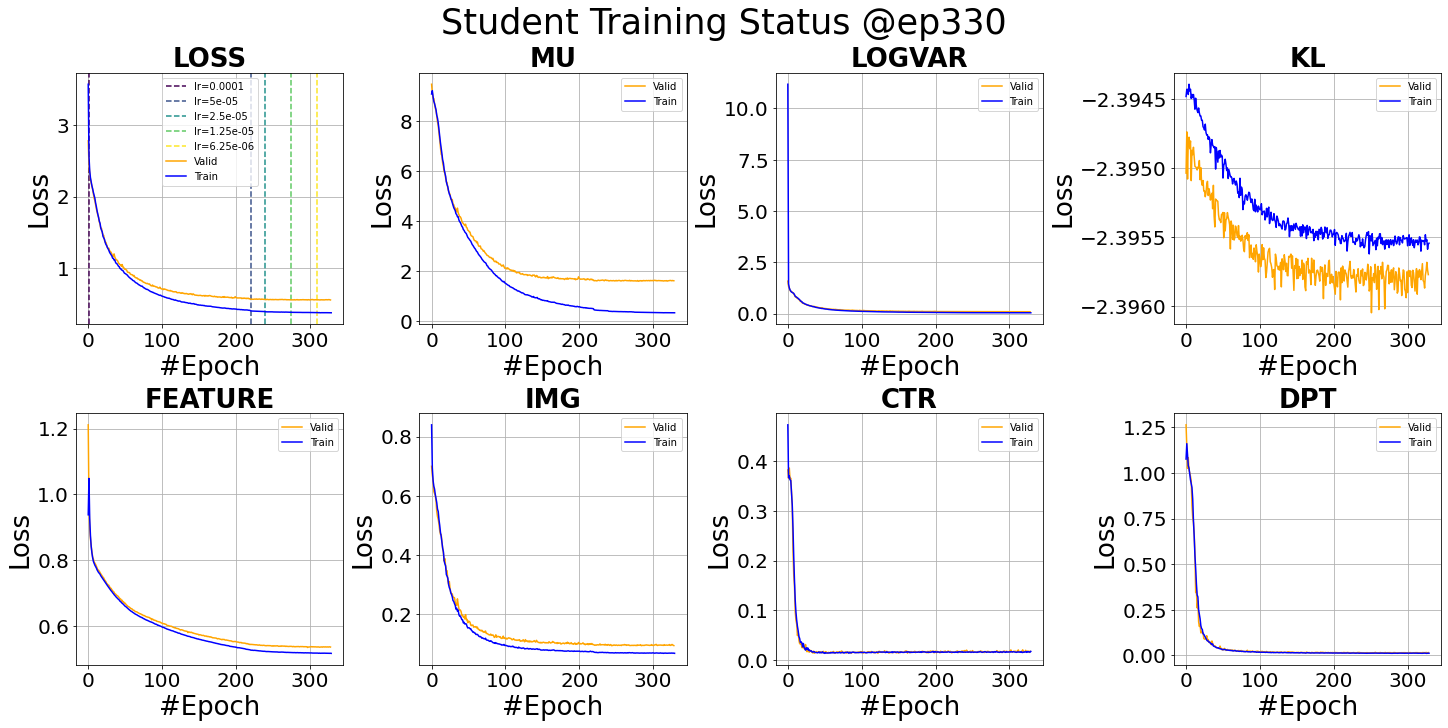

==========240822_300_V08F7_KL_4 Test starting==========



/home/bob/.local/lib/python3.7/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([2])) that is different to the input size (torch.Size([1, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/bob/.local/lib/python3.7/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Student test: sample=50/52, loss=0.2317    
Test finished. Average loss={'LOSS': 0.3734120982408058, 'MU': 0.27622141581489884, 'LOGVAR': 0.03580744821864265, 'KL': -2.395509954685202, 'FEATURE': 0.5171032138885214, 'IMG': 0.06465699790435163, 'CTR': 0.016735148604979735, 'DPT': 0.01060278338609558}

Total training time: 58.67114305496216 sec


<Figure size 1440x720 with 0 Axes>

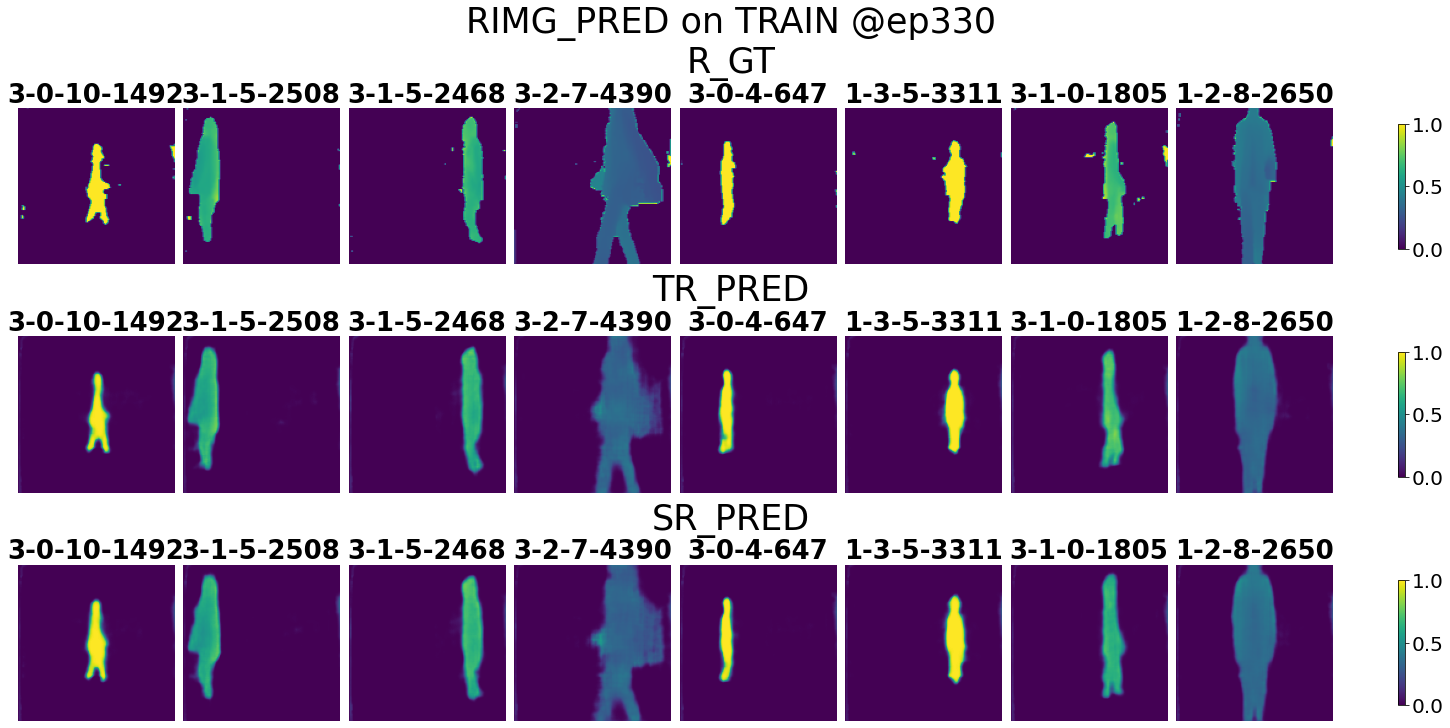

<Figure size 1440x720 with 0 Axes>

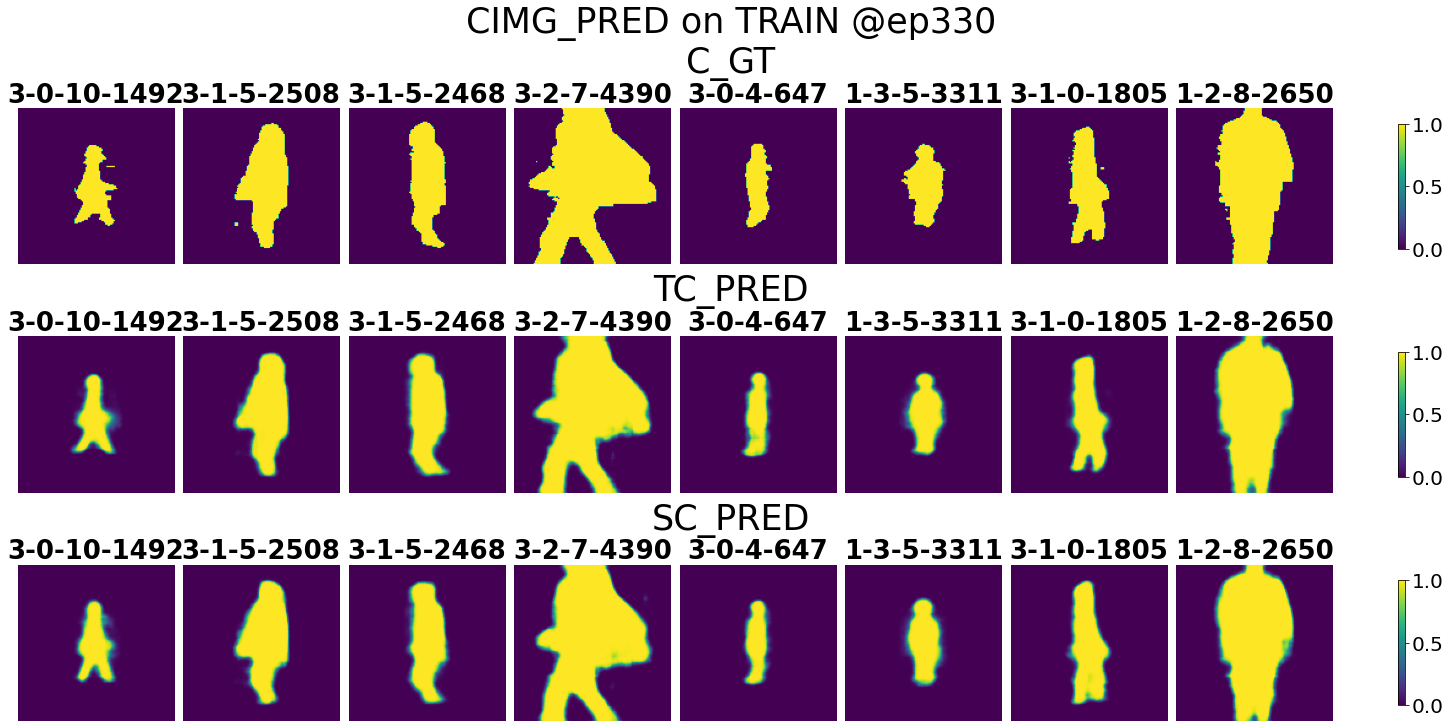

<Figure size 1440x720 with 0 Axes>

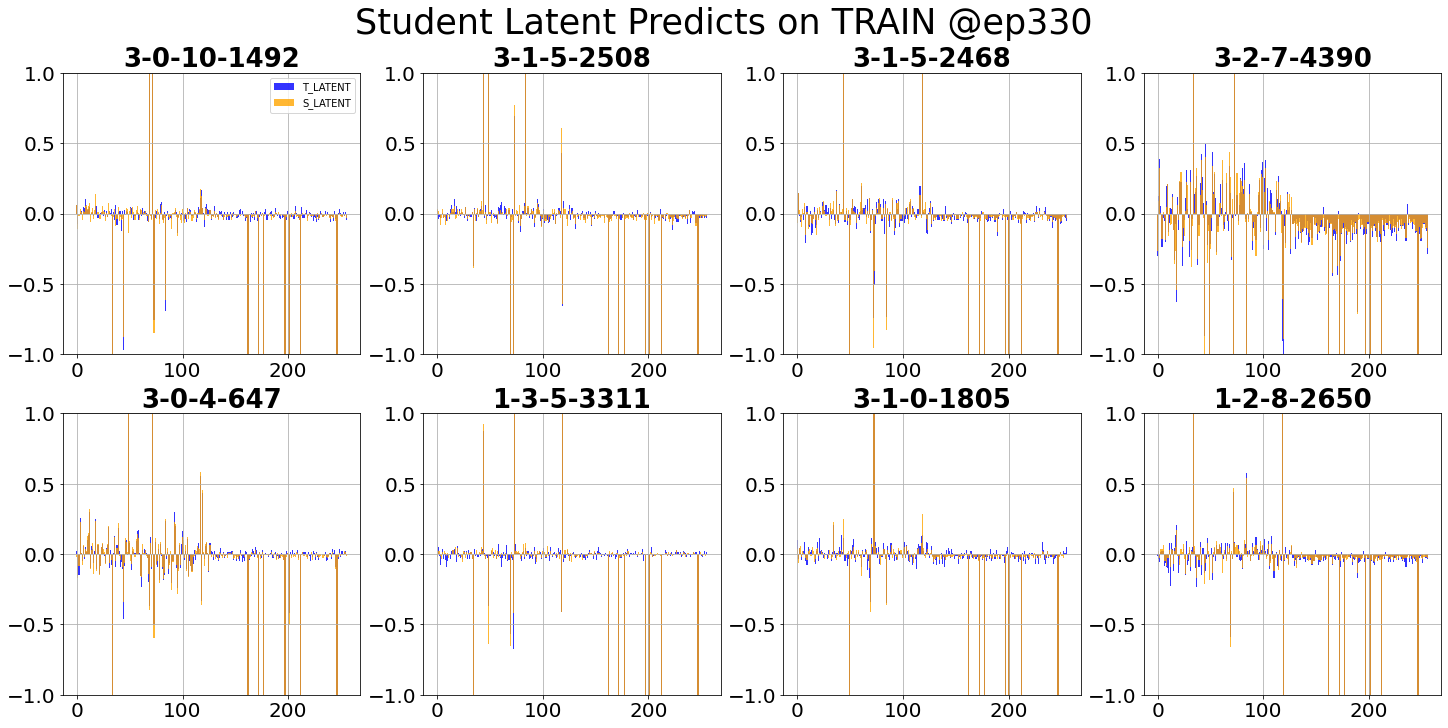

<Figure size 1440x720 with 0 Axes>

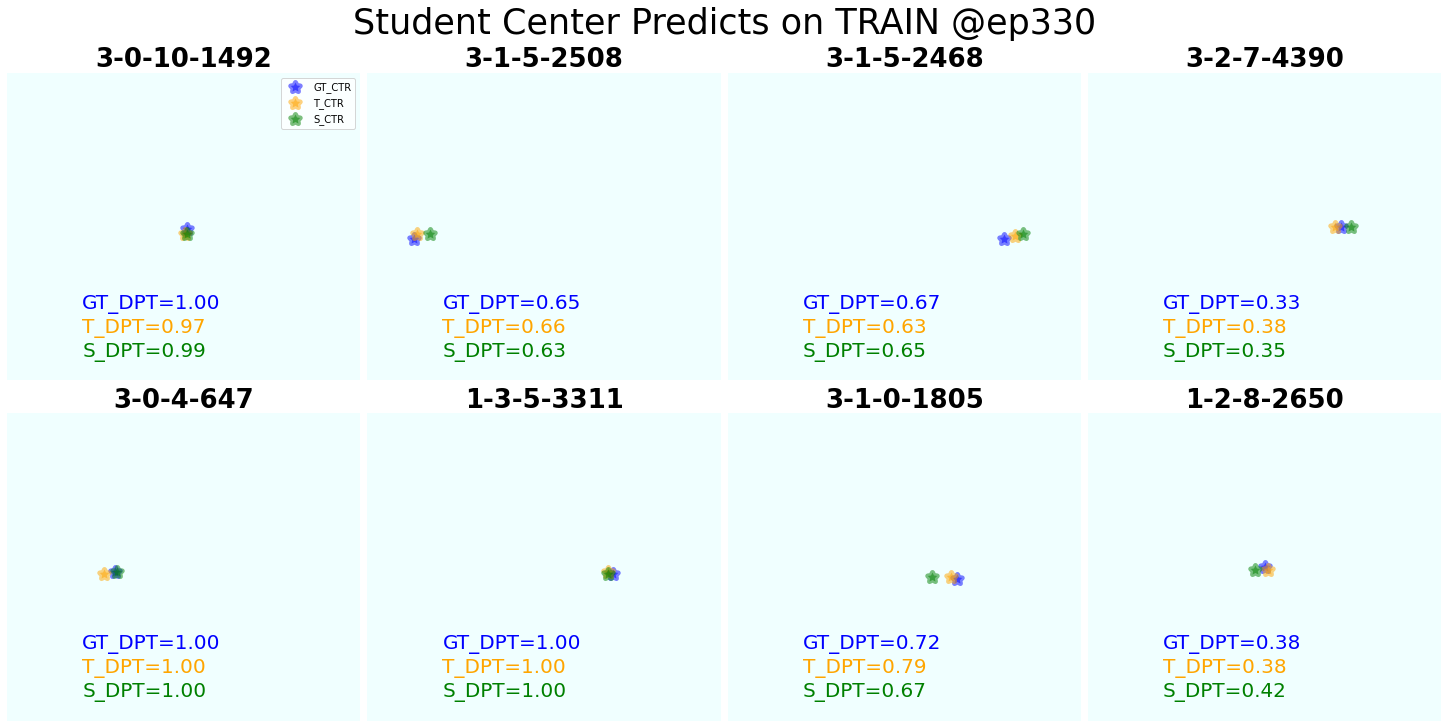

<Figure size 1440x720 with 0 Axes>

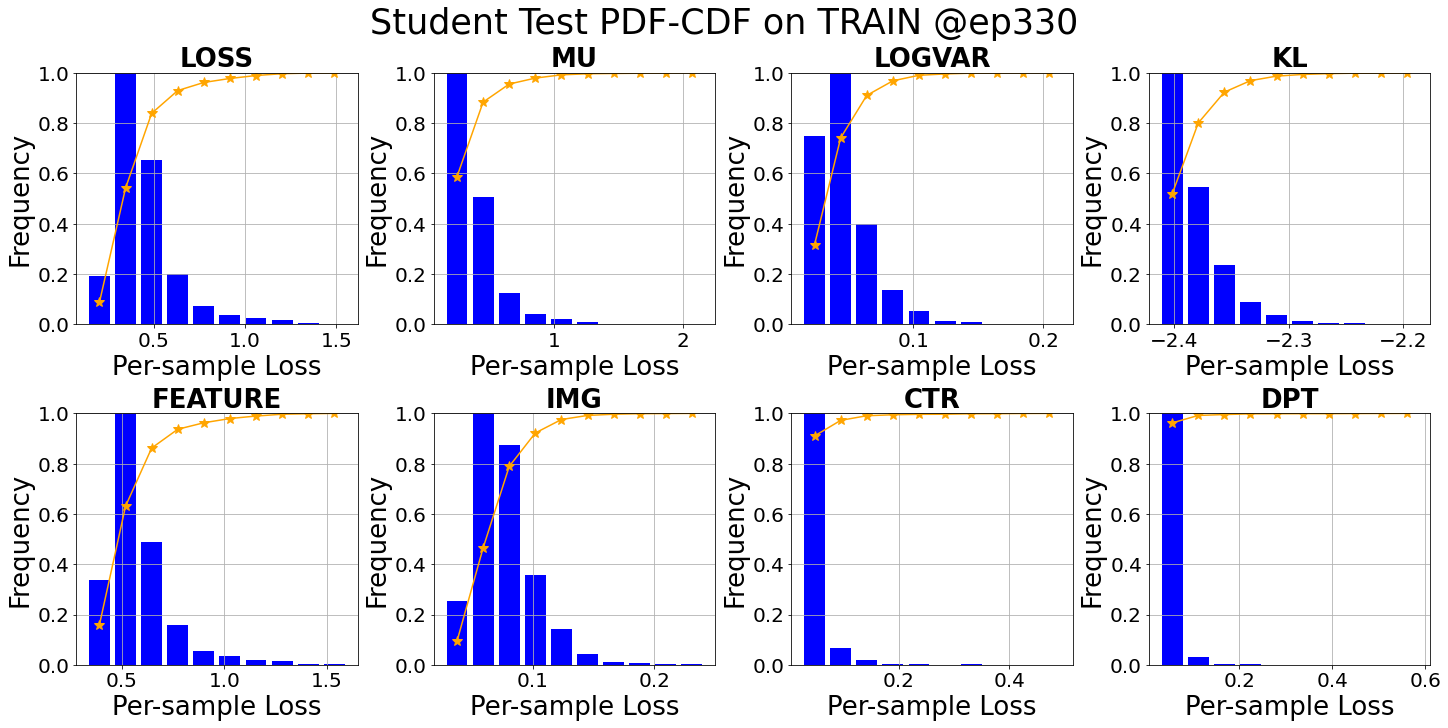

==========240822_300_V08F7_KL_4 Test starting==========

Student test: sample=5295/5299, loss=0.9220    
Test finished. Average loss={'LOSS': 1.4681955745792048, 'MU': 6.471892007174729, 'LOGVAR': 0.6357531670019084, 'KL': -2.3978092209711055, 'FEATURE': 0.5961087177240257, 'IMG': 0.40110325421923554, 'CTR': 0.03979642980557244, 'DPT': 0.18055854184780382}

Total training time: 123.65368723869324 sec


<Figure size 1440x720 with 0 Axes>

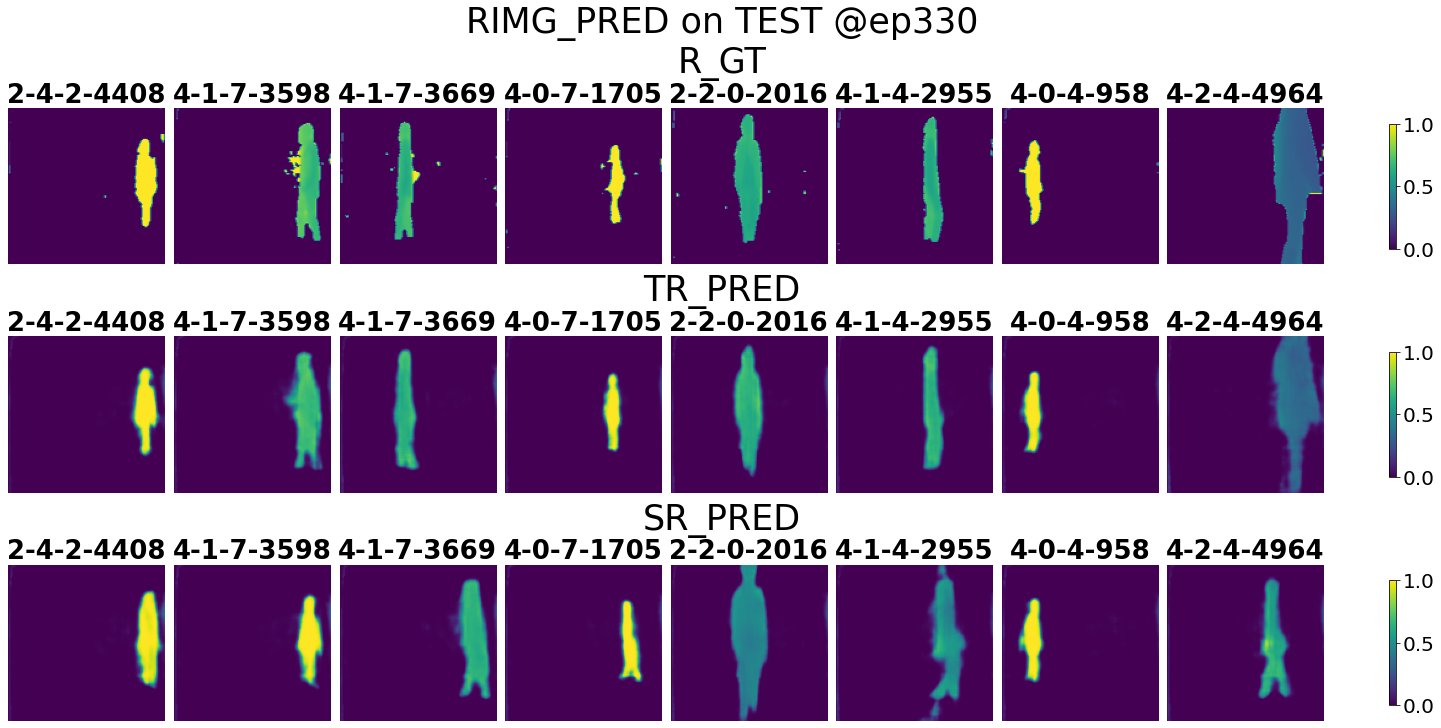

<Figure size 1440x720 with 0 Axes>

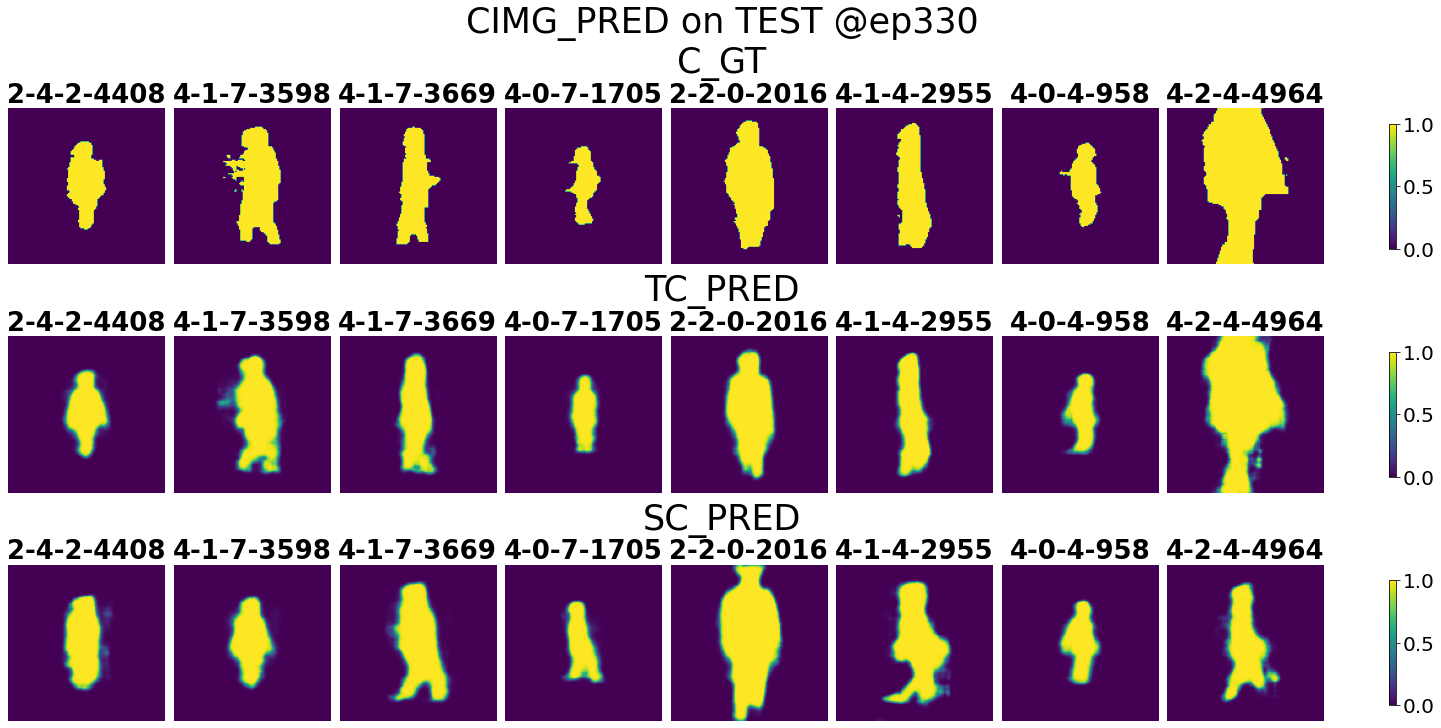

<Figure size 1440x720 with 0 Axes>

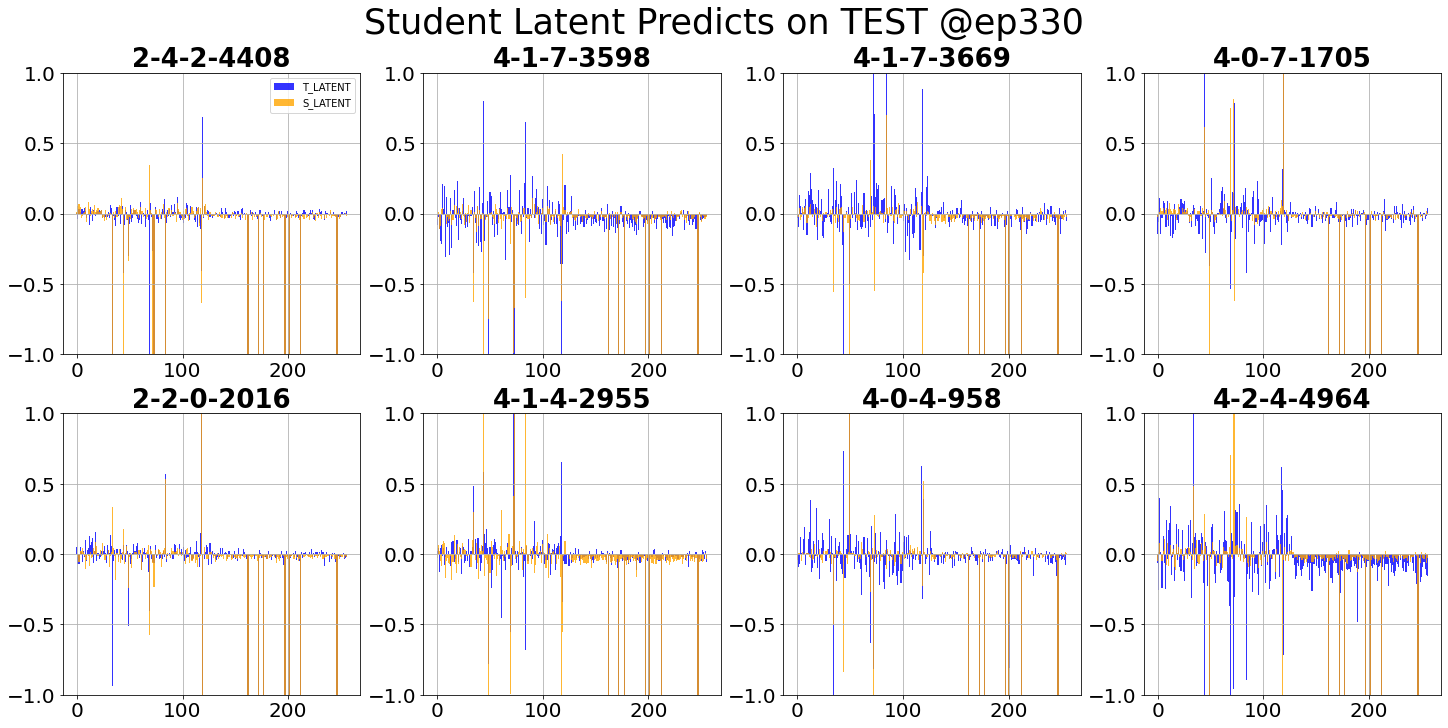

<Figure size 1440x720 with 0 Axes>

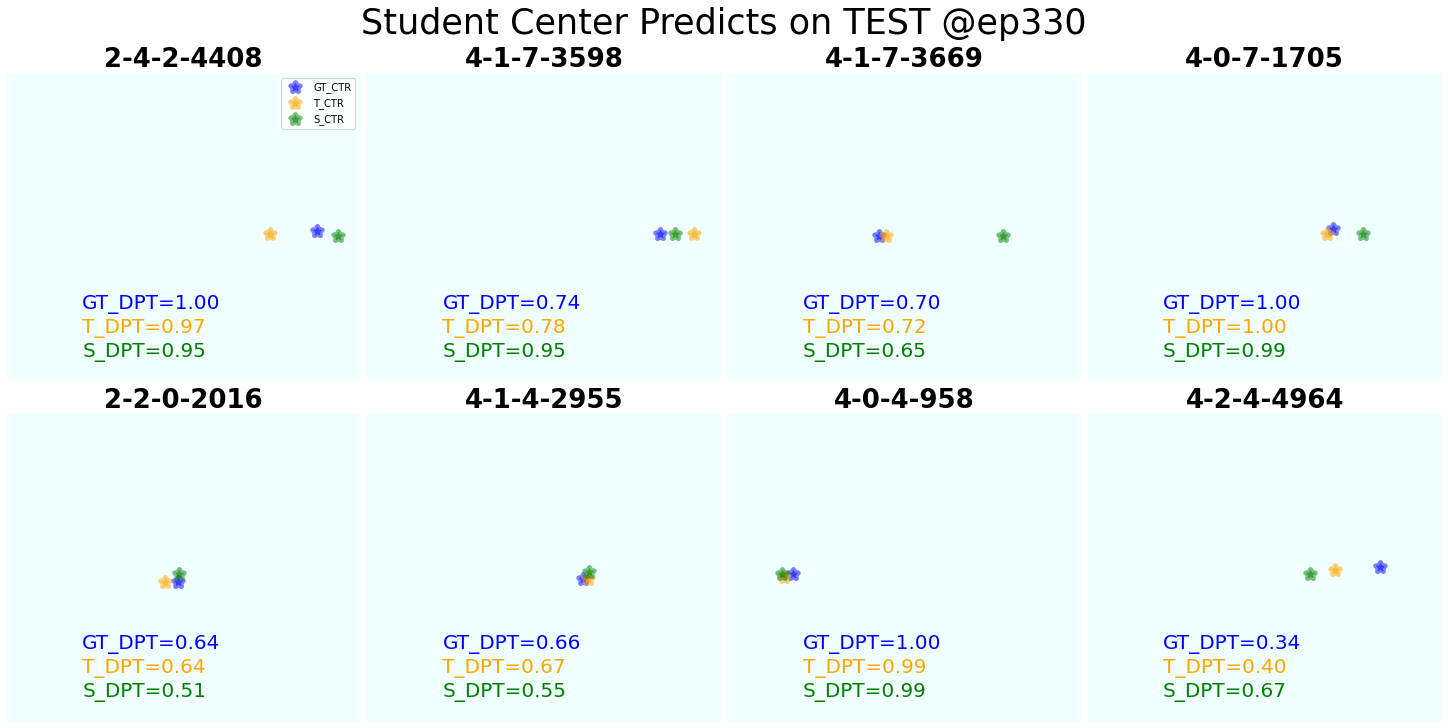

<Figure size 1440x720 with 0 Axes>

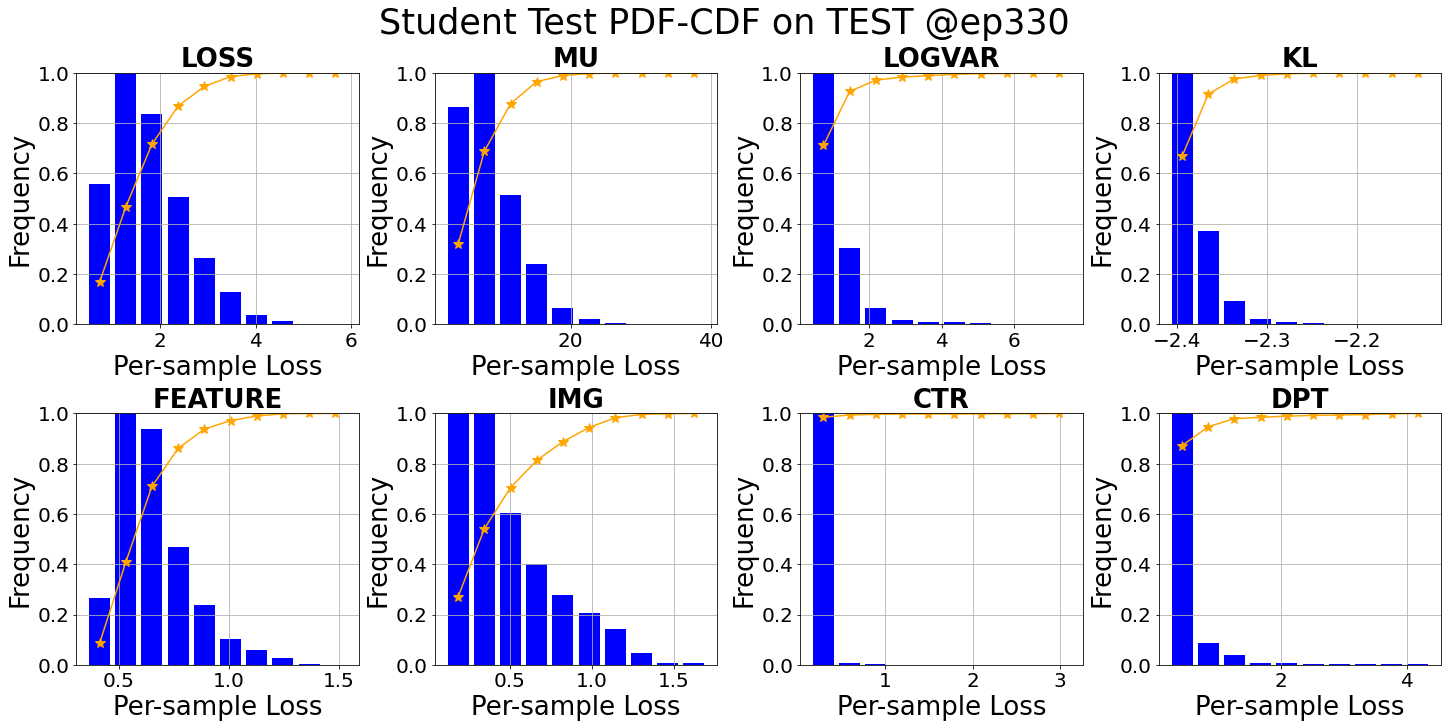

Saving preds: TR_PRED...
Saving preds: SR_PRED...
Saving preds: TC_PRED...
Saving preds: SC_PRED...
Saving preds: T_LATENT...
Saving preds: S_LATENT...
Saving preds: T_CTR...
Saving preds: T_DPT...
Saving preds: S_CTR...
Saving preds: S_DPT...
Saving preds: TAG...
All saved!

Student schedule Completed!


In [2]:
gpu = 1
date = '240822'

run = ((30, 7), (100, 25), (300, 75))
exp = 'V08F7_KL'
        
torch.cuda.set_device(gpu)

#for r, step in run:
if True:
    r, step = 300, 75
    datadir = f'../dataset/0509/make20_{r}-split/'
    transform = transforms.Compose([
        transforms.Resize([128, 128]),
        transforms.ToTensor()])
    data = DS.ModalityLoader(data_dir=datadir, mmap_mode='r')
    train_set = DS.MyDataset('tv', data.train_data, transform=transform)
    test_set = DS.MyDataset('test', data.test_data, transform=transform)
    train_loader, valid_loader = DS.DataSplitter(train_set).split_loader()
    test_loader = DS.DataSplitter(test_set, 1).gen_loader()
    
#    for ver, flag in (('', False), ('_depthLoss', True)):   
    if True:
        ver, flag = '_4', True
        S_trainer = TP.StudentTrainer(name='Student',
                                      lstm_steps = step,
                                      beta=0.5,
                                      loss_optimizer = {'LOSS': [torch.optim.Adam, 1e-4]},
                                      lr=1e-4, epochs=10, cuda=gpu,
                                      notion=f"{date}_{r}_{exp}{ver}",
                                      train_loader=train_loader, valid_loader=valid_loader, test_loader=test_loader,
                                     )
        S_trainer.models['imgen'].load_state_dict(torch.load(f"../saved/240809_30_V08F6/Teacher_imgen_best.pth"))
        S_trainer.models['cimgde'].load_state_dict(torch.load(f"../saved/240809_30_V08F6/Teacher_cimgde_best.pth"))
        S_trainer.models['rimgde'].load_state_dict(torch.load(f"../saved/240809_30_V08F6/Teacher_rimgde_best.pth"))
        S_trainer.models['ctrde'].load_state_dict(torch.load(f"../saved/240809_30_V08F6/Teacher_ctrde_best.pth"))
        %matplotlib inline
        S_trainer.loss_optimizer = {'LOSS': [torch.optim.Adam, 1e-4]}
        S_trained = S_trainer.schedule(lr_decay=True, train_module={'csien'}, eval_module={'imgen', 'cimgde', 'rimgde', 'ctrde'})